## Problem Statement

An education company named X Education sells online courses to industry professionals. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead.

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

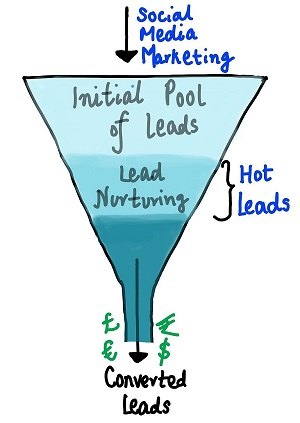

**The company requires a model that will assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.**

In [287]:
import warnings
warnings.filterwarnings('ignore')

In [288]:
import pandas as pd, numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [289]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score


from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width',None)

In [290]:
l_s = pd.read_csv("Leads.csv")
l_s.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [291]:
l_s.shape

(9240, 37)

# Unique Values Check

In [292]:
l_s.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [293]:
l_s.describe(include = 'object')

Prospect ID              Lead Origin  \
count                                   9240                     9240   
unique                                  9240                        5   
top     7927b2df-8bba-4d29-b9a2-b6e0beafe620  Landing Page Submission   
freq                                       1                     4886   

       Lead Source Do Not Email Do Not Call Last Activity Country  \
count         9204         9240        9240          9137    6779   
unique          21            2           2            17      38   
top         Google           No          No  Email Opened   India   
freq          2868         8506        9238          3437    6492   

       Specialization How did you hear about X Education  \
count            7802                               7033   
unique             19                                 10   
top            Select                             Select   
freq             1942                               5043   

       What is your current occupation  \
count                             6550   
unique                               6   
top                         Unemployed   
freq                              5600   

       What matters most to you in choosing a course Search Magazine  \
count                                           6531   9240     9240   
unique                                             3      2        1   
top                          Better Career Prospects     No       No   
freq                                            6528   9226     9240   

       Newspaper Article X Education Forums Newspaper Digital Advertisement  \
count               9240               9240      9240                  9240   
unique                 2                  2         2                     2   
top                   No                 No        No                    No   
freq                9238               9239      9239                  9236   

       Through Recommendations Receive More Updates About Our Courses  \
count                     9240                                   9240   
unique                       2                                      1   
top                         No                                     No   
freq                      9233                                   9240   

                                       Tags Lead Quality  \
count                                  5887         4473   
unique                                   26            5   
top     Will revert after reading the email     Might be   
freq                                   2072         1560   

       Update me on Supply Chain Content Get updates on DM Content  \
count                               9240                      9240   
unique                                 1                         1   
top                                   No                        No   
freq                                9240                      9240   

       Lead Profile    City Asymmetrique Activity Index  \
count          6531    7820                        5022   
unique            6       7                           3   
top          Select  Mumbai                   02.Medium   
freq           4146    3222                        3839   

       Asymmetrique Profile Index I agree to pay the amount through cheque  \
count                        5022                                     9240   
unique                          3                                        1   
top                     02.Medium                                       No   
freq                         2788                                     9240   

       A free copy of Mastering The Interview Last Notable Activity  
count                                    9240                  9240  
unique                                      2                    16  
top                                        No              Modified  
freq                                     6352                  3407

# **DATA CLEANING**

## Removing 100% unique Values and only 1 unique value

In [294]:
# Dropping redundant columns
l_s=l_s.drop(columns=['Prospect ID', 'Lead Number', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'])

# Null Value Check

In [295]:
l_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [296]:
l_s.describe()

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9103.000000                  9240.000000   
mean      0.385390     3.445238                   487.698268   
std       0.486714     4.854853                   548.021466   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

# Duplicate Value Check

In [297]:
l_s[l_s.duplicated()]

Lead Origin       Lead Source Do Not Email Do Not Call  Converted  \
16              API        Olark Chat           No          No          0   
47              API        Olark Chat           No          No          0   
49              API        Olark Chat           No          No          0   
83              API        Olark Chat           No          No          0   
190             API        Olark Chat           No          No          0   
192             API        Olark Chat           No          No          0   
198             API        Olark Chat           No          No          0   
199             API        Olark Chat           No          No          0   
236             API        Olark Chat           No          No          0   
241             API        Olark Chat           No          No          0   
248             API        Olark Chat           No          No          0   
256             API        Olark Chat           No          No          0   
263             API        Olark Chat           No          No          0   
270   Lead Add Form         Reference           No          No          1   
278             API        Olark Chat           No          No          0   
290             API        Olark Chat           No          No          0   
300             API        Olark Chat           No          No          0   
323             API        Olark Chat           No          No          0   
332             API        Olark Chat           No          No          0   
351             API        Olark Chat           No          No          0   
366             API        Olark Chat           No          No          0   
368             API        Olark Chat           No          No          0   
380             API        Olark Chat           No          No          0   
383             API        Olark Chat           No          No          0   
395             API        Olark Chat           No          No          0   
460   Lead Add Form  Welingak Website           No          No          1   
476             API        Olark Chat           No          No          0   
478             API        Olark Chat           No          No          0   
480             API        Olark Chat           No          No          0   
507   Lead Add Form  Welingak Website           No          No          1   
514             API        Olark Chat           No          No          0   
518             API        Olark Chat           No          No          0   
527             API        Olark Chat           No          No          0   
552             API        Olark Chat           No          No          0   
557             API        Olark Chat           No          No          0   
645             API        Olark Chat           No          No          0   
660             API        Olark Chat           No          No          0   
742             API        Olark Chat           No          No          0   
762             API        Olark Chat           No          No          0   
774             API        Olark Chat          Yes          No          0   
793             API        Olark Chat           No          No          0   
817             API        Olark Chat           No          No          0   
820             API        Olark Chat           No          No          0   
830             API        Olark Chat           No          No          0   
852             API        Olark Chat           No          No          0   
909             API        Olark Chat           No          No          0   
920             API        Olark Chat           No          No          0   
929             API        Olark Chat           No          No          0   
932             API        Olark Chat           No          No          0   
992             API        Olark Chat           No          No          0   
1028            API        Olark Chat           No          No          0   
1029

In [298]:
# Finding out columns with 'Select' Value
cols_with_select_value = [col for col in l_s.columns if len(l_s[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


## Data has missing values. We need to either replace NaN values or remove the Null Columns

In [299]:
l_s = l_s.replace('Select', np.nan)

In [300]:
l_s.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [301]:
#Finding percentage of null values in columns
100*(l_s.isna().mean()).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

## Removing parameters which have more than 40% missing data:
- How did you hear about X Education
- Lead Quality 
- Lead Profile
- Asymmetrique Activity Index
- Asymmetrique Profile Index
- Asymmetrique Activity Score 
- Asymmetrique Profile Score

In [302]:
l_s=l_s.drop(columns=['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'])

In [303]:
100*(l_s.isna().mean()).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
X Education Forums                                0.000000
A free copy of Mastering The Interview            0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
Lead Origin                                       0.0000

### City can be dropped since apart from India, Indian cities are mapped which cannot be true.

In [304]:
l_s=l_s.drop(columns=['City'])

In [305]:
100*(l_s.isna().mean()).sort_values(ascending=False)

Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
X Education Forums                                0.000000
A free copy of Mastering The Interview            0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
Lead Origin                                       0.000000
Newspaper Article                                 0.0000

In [306]:
#Finding shape after dropped columns
l_s.shape

(9240, 24)

## Taking missing categories in categorical data

In [307]:
categorical_cols = l_s.select_dtypes(include=['category', 'object']).columns.tolist()
print(categorical_cols)

['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [308]:
columnsList= ['Specialization','Tags','What matters most to you in choosing a course', 'What is your current occupation','Country','Last Activity','Lead Source']

for i in columnsList:
        Percentage = 100*l_s[i].value_counts(normalize=True)
        print("Value % For :",i,"\n")
        print(Percentage ,"\n")
        print("___"*40,"\n")

Value % For : Specialization 

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64 

____________________________________________________________________________________

## Based on data so far, we can conclude that:
- Specialization: can give insights on the Conversion. But since it has 36.58 %, we can replace the null value with Others (Others)
- Tags: Tags are column with information updated post connecting with Leads hence we can drop it
- What matters most to you in choosing a course: This can be dropped since 99.95% respondents have indicated Better Career Prospects, the data is biased and hence not  to be taken for model building
- What is your current occupation: This may be an important factor determining the Conversion Rate (Unemployed)
- Country: India is selected for 95% which will create biasedness and hence can be dropped
- Last Activity: Can give insights on conversion and data is spread across parameters (Email Opened)
- Lead Source: Can give insights on conversion and data is spread across parameters (Google)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

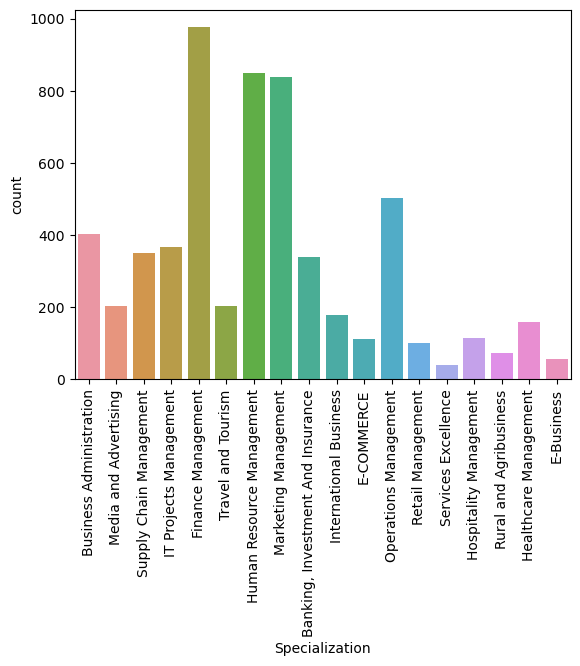

In [309]:
sns.countplot(l_s['Specialization'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

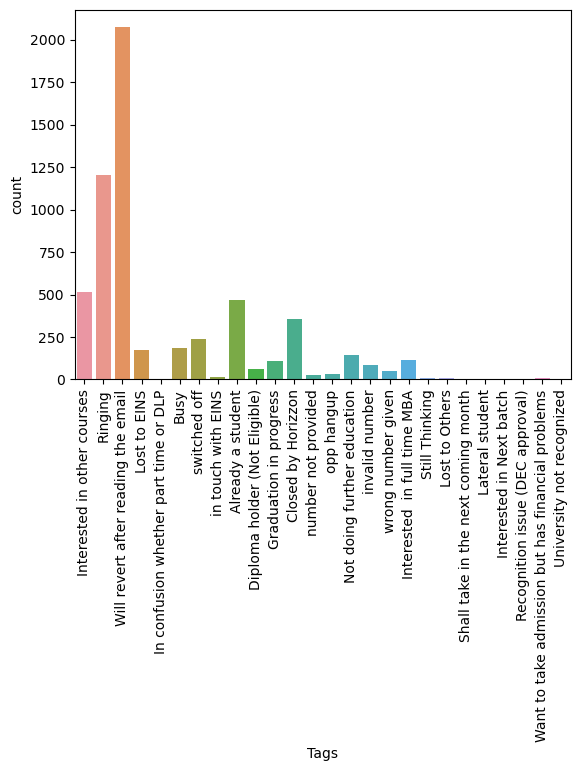

In [310]:
sns.countplot(l_s['Tags'])
plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

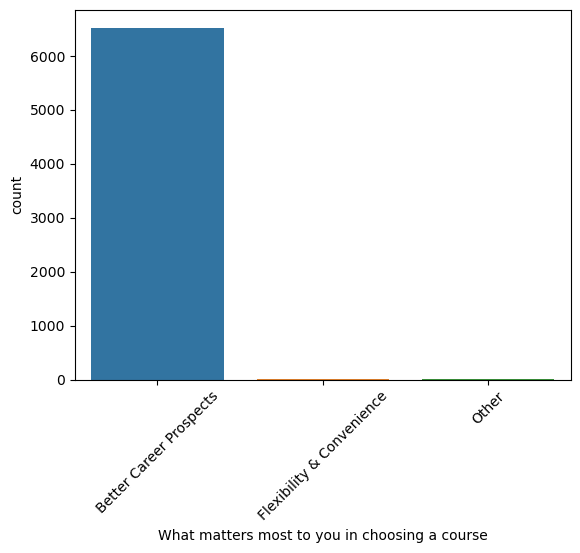

In [311]:
sns.countplot(l_s['What matters most to you in choosing a course'])
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

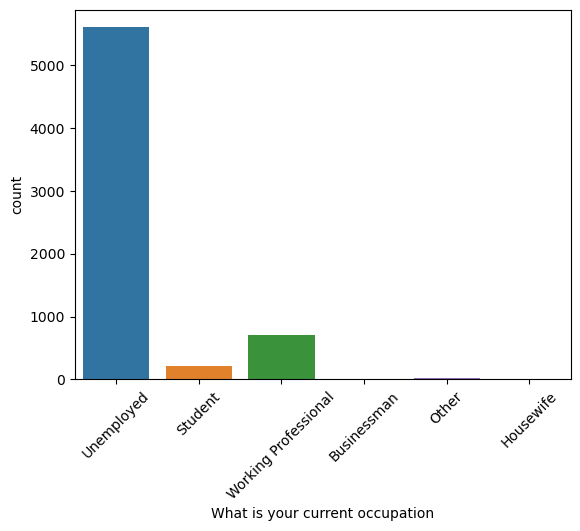

In [312]:
sns.countplot(l_s['What is your current occupation'])
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

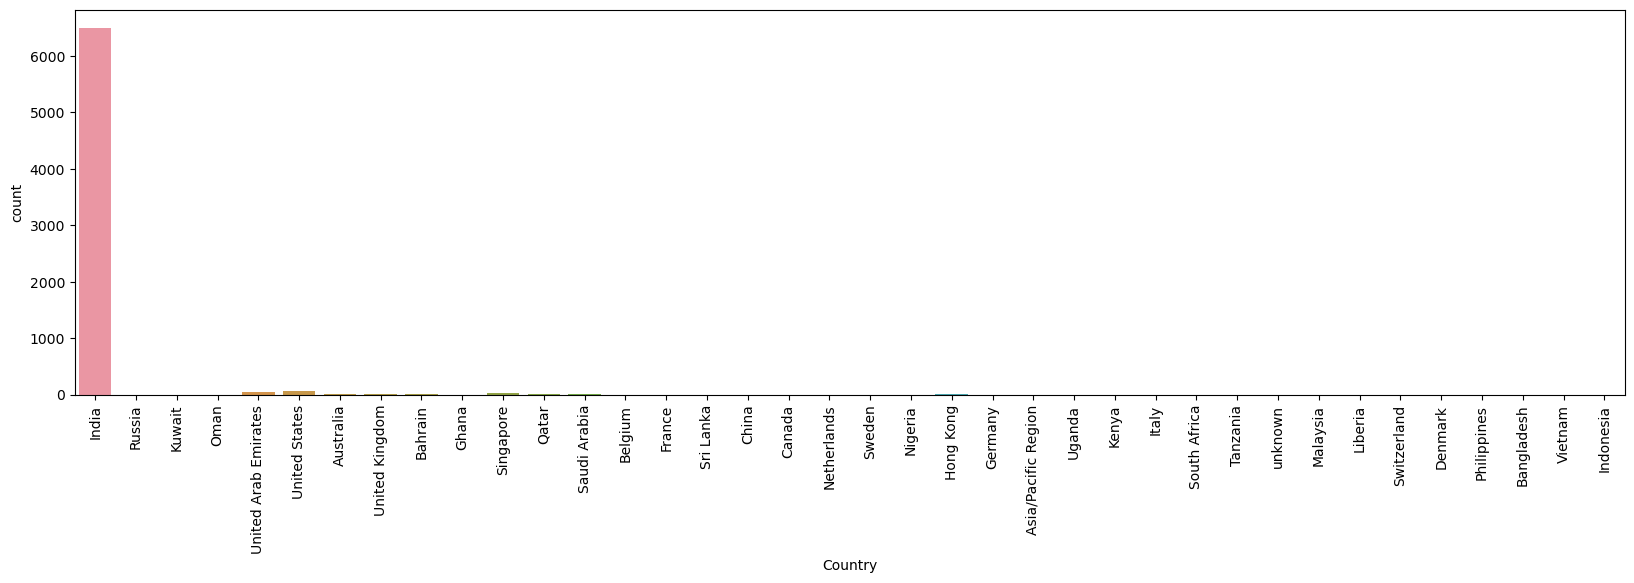

In [313]:
plt.figure(figsize=(20,5))
sns.countplot(l_s['Country'])
plt.xticks(rotation=90)

In [314]:
l_s=l_s.drop(columns=['Tags', 'What matters most to you in choosing a course', 'Country'])

In [315]:
l_s.shape

(9240, 21)

In [316]:
Missing = {'Specialization':'Others', 'What is your current occupation':'Unemployed', 'Last Activity':'Email Opened', 'Lead Source':'Google'}
l_s=l_s.fillna(value = Missing)

# Missing Value replacement check

In [317]:
round(((l_s.isnull().sum()/l_s.shape[0])*100),2).sort_values(ascending=False)

TotalVisits                               1.48
Page Views Per Visit                      1.48
Lead Origin                               0.00
Magazine                                  0.00
A free copy of Mastering The Interview    0.00
Receive More Updates About Our Courses    0.00
Through Recommendations                   0.00
Digital Advertisement                     0.00
Newspaper                                 0.00
X Education Forums                        0.00
Newspaper Article                         0.00
What is your current occupation           0.00
Search                                    0.00
Lead Source                               0.00
Specialization                            0.00
Last Activity                             0.00
Total Time Spent on Website               0.00
Converted                                 0.00
Do Not Call                               0.00
Do Not Email                              0.00
Last Notable Activity                     0.00
dtype: float6

In [318]:
l_s.describe(include = 'object')

Lead Origin Lead Source Do Not Email Do Not Call  \
count                      9240        9240         9240        9240   
unique                        5          21            2           2   
top     Landing Page Submission      Google           No          No   
freq                       4886        2904         8506        9238   

       Last Activity Specialization What is your current occupation Search  \
count           9240           9240                            9240   9240   
unique            17             19                               6      2   
top     Email Opened         Others                      Unemployed     No   
freq            3540           3380                            8290   9226   

       Magazine Newspaper Article X Education Forums Newspaper  \
count      9240              9240               9240      9240   
unique        1                 2                  2         2   
top          No                No                 No        No   
freq       9240              9238               9239      9239   

       Digital Advertisement Through Recommendations  \
count                   9240                    9240   
unique                     2                       2   
top                       No                      No   
freq                    9236                    9233   

       Receive More Updates About Our Courses  \
count                                    9240   
unique                                      1   
top                                        No   
freq                                     9240   

       A free copy of Mastering The Interview Last Notable Activity  
count                                    9240                  9240  
unique                                      2                    16  
top                                        No              Modified  
freq                                     6352                  3407

In [319]:
l_s=l_s.drop(columns=['Magazine', 'Receive More Updates About Our Courses', 'Last Notable Activity'])

In [320]:
l_s.shape

(9240, 18)

In [321]:
print("TotalVisits - Counts")
l_s.TotalVisits.value_counts().head(10)

TotalVisits - Counts


0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

## Missing values to be replaced with mode of the column

In [322]:
l_s['TotalVisits'].fillna(l_s['TotalVisits'].mode()[0], inplace=True)

In [323]:
print("Page Views Per Visit - Counts")
l_s['Page Views Per Visit'].value_counts().head(10)

Page Views Per Visit - Counts


0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
5.0     517
1.5     306
6.0     244
2.5     241
7.0     133
Name: Page Views Per Visit, dtype: int64

In [324]:
l_s['Page Views Per Visit'].fillna(l_s['Page Views Per Visit'].mode()[0], inplace=True)

In [325]:
print("Page Views Per Visit - Counts")
l_s['Page Views Per Visit'].value_counts().head(10)

Page Views Per Visit - Counts


0.0    2326
2.0    1795
3.0    1196
4.0     896
1.0     651
5.0     517
1.5     306
6.0     244
2.5     241
7.0     133
Name: Page Views Per Visit, dtype: int64

In [326]:
round(((l_s.isnull().sum()/l_s.shape[0])*100),2).sort_values(ascending=False)

Lead Origin                               0.0
Lead Source                               0.0
Through Recommendations                   0.0
Digital Advertisement                     0.0
Newspaper                                 0.0
X Education Forums                        0.0
Newspaper Article                         0.0
Search                                    0.0
What is your current occupation           0.0
Specialization                            0.0
Last Activity                             0.0
Page Views Per Visit                      0.0
Total Time Spent on Website               0.0
TotalVisits                               0.0
Converted                                 0.0
Do Not Call                               0.0
Do Not Email                              0.0
A free copy of Mastering The Interview    0.0
dtype: float64

In [327]:
l_s.shape

(9240, 18)

### Checking Skewness in data columns

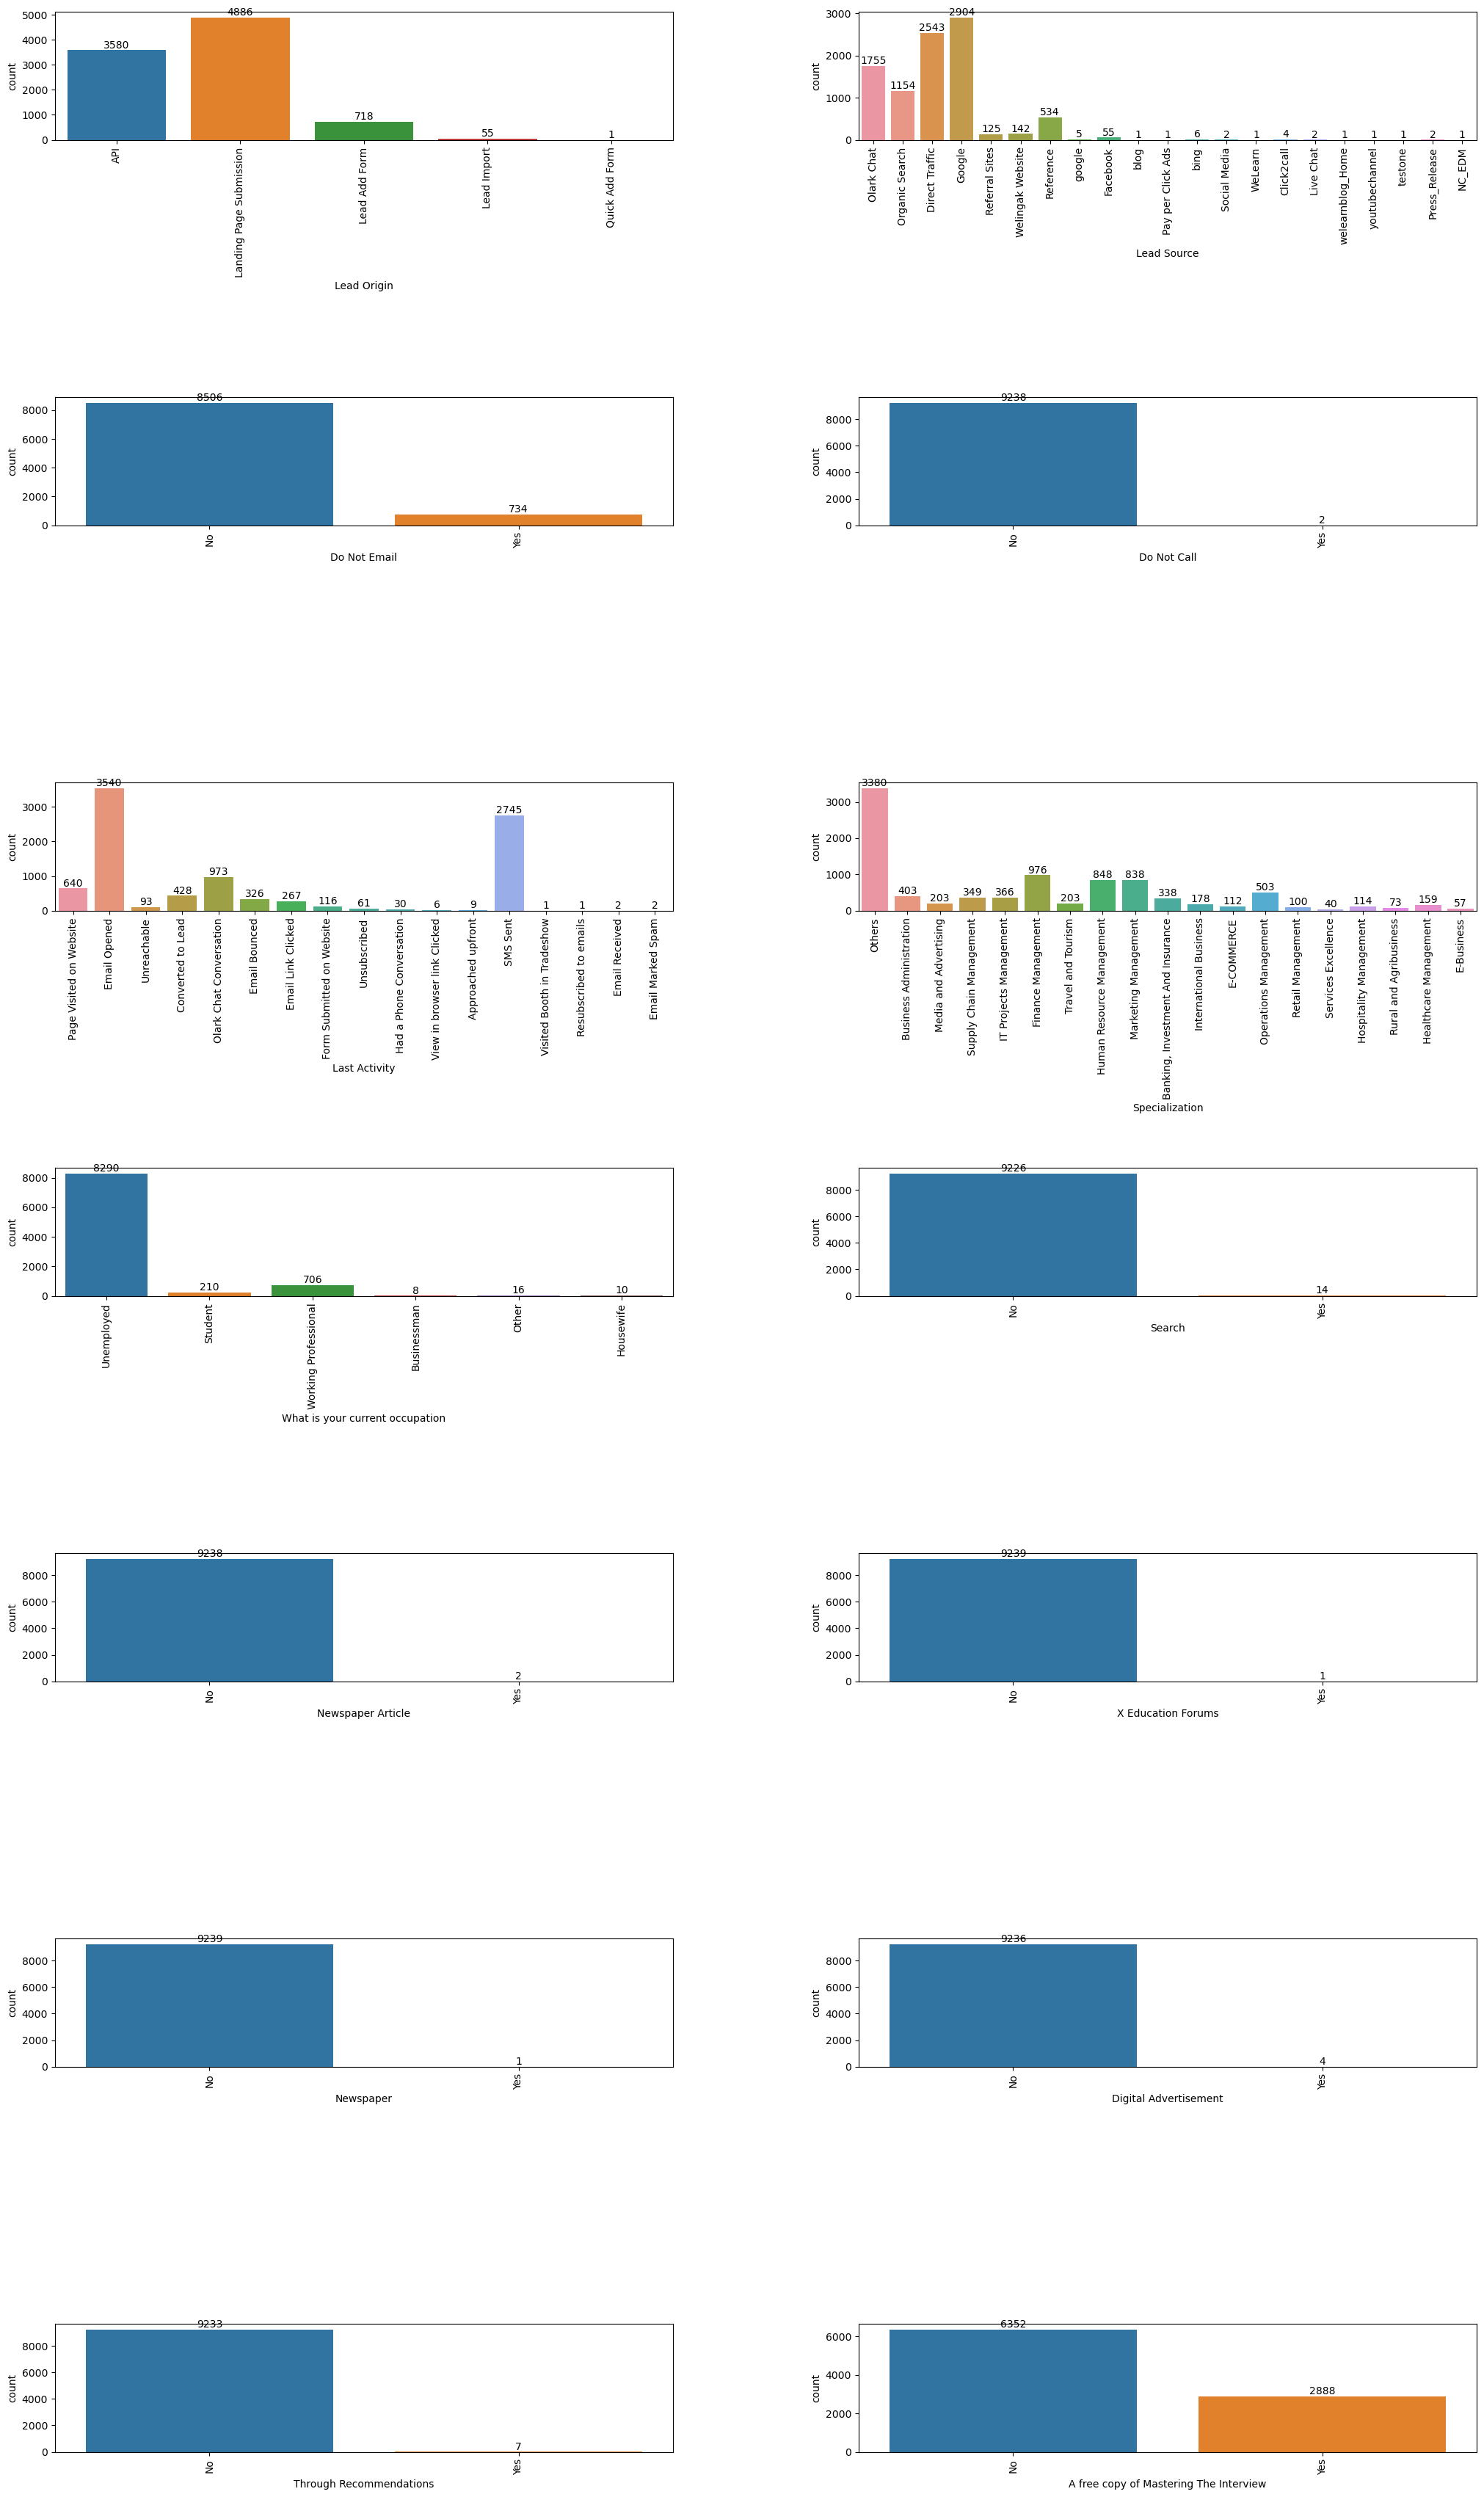

In [328]:
categorical_col = l_s.select_dtypes(include = ['category', 'object']).columns.tolist()

plt.figure(figsize = (25,50))

plt.subplots_adjust(wspace = .3, hspace = 2)

for i in enumerate(categorical_col):
    plt.subplot(8, 2 , i[0]+1)
    ax = sns.countplot(x = i[1], data = l_s) 
    plt.xticks(rotation = 90)
    
   
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.show()

## As per the charts above, skewed data is observed for: 
Do Not Call, 
Search, 
Newspaper Article, 
X Education Forums, 
Newspaper, 
Digital Advertisement & Through Recommendations

**These data columns can hence be dropped to remove biasedness.**

In [329]:
l_s=l_s.drop(columns=['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'])

In [330]:
l_s.shape

(9240, 11)

In [331]:
l_s.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

# **DATA OUTLIER CHECKING**

In [332]:
def Check_Outliers(data, columnList):

    plt.figure(figsize = [20,10])
    plt.subplots_adjust(wspace = .6,hspace = .5)

    for i,j in enumerate(columnList):
        plt.subplot(2, 2, i+1)

        sns.boxplot(y = data[j])    
        
        plt.suptitle("\n Outlier Analysis with Boxplot",fontsize = 20, color = "brown")
        
        plt.ylabel(None)
        
        plt.title(j, fontsize = 15, color='blue')

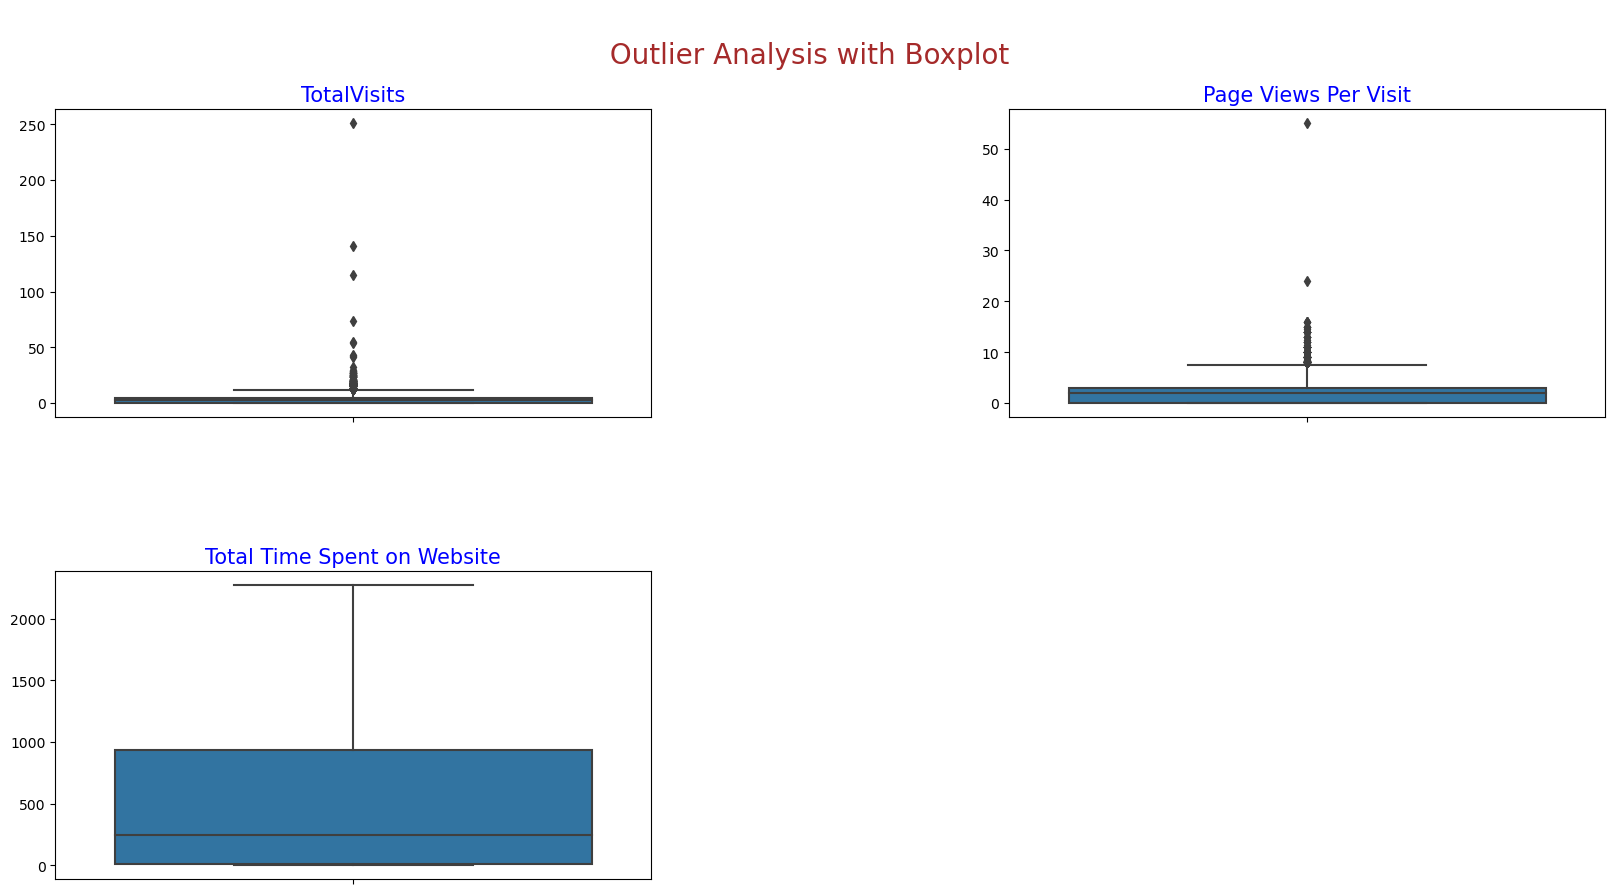

In [333]:
OC = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

Check_Outliers(l_s, OC)

In [334]:
l_s.describe(percentiles=[.10,.25,.50,.75,.95])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.394156                   487.698268   
std       0.486714     4.836682                   548.021466   
min       0.000000     0.000000                     0.000000   
10%       0.000000     0.000000                     0.000000   
25%       0.000000     0.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
95%       1.000000    10.000000                  1562.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.327787  
std                2.164258  
min                0.000000  
10%                0.000000  
25%                0.000000  
50%                2.000000  
75%                3.000000  
95%                6.000000  
max               55.000000

# Capping and Flooring of Outliers

In [335]:
def Outliers(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

       
        df[i] = np.where(df[i] > upper_bound, upper_bound, df[i])

        
        df[i] = np.where(df[i] < lower_bound, lower_bound, df[i])

In [336]:
Out_Cap = ["TotalVisits", "Page Views Per Visit"]
Outliers(l_s, Out_Cap)

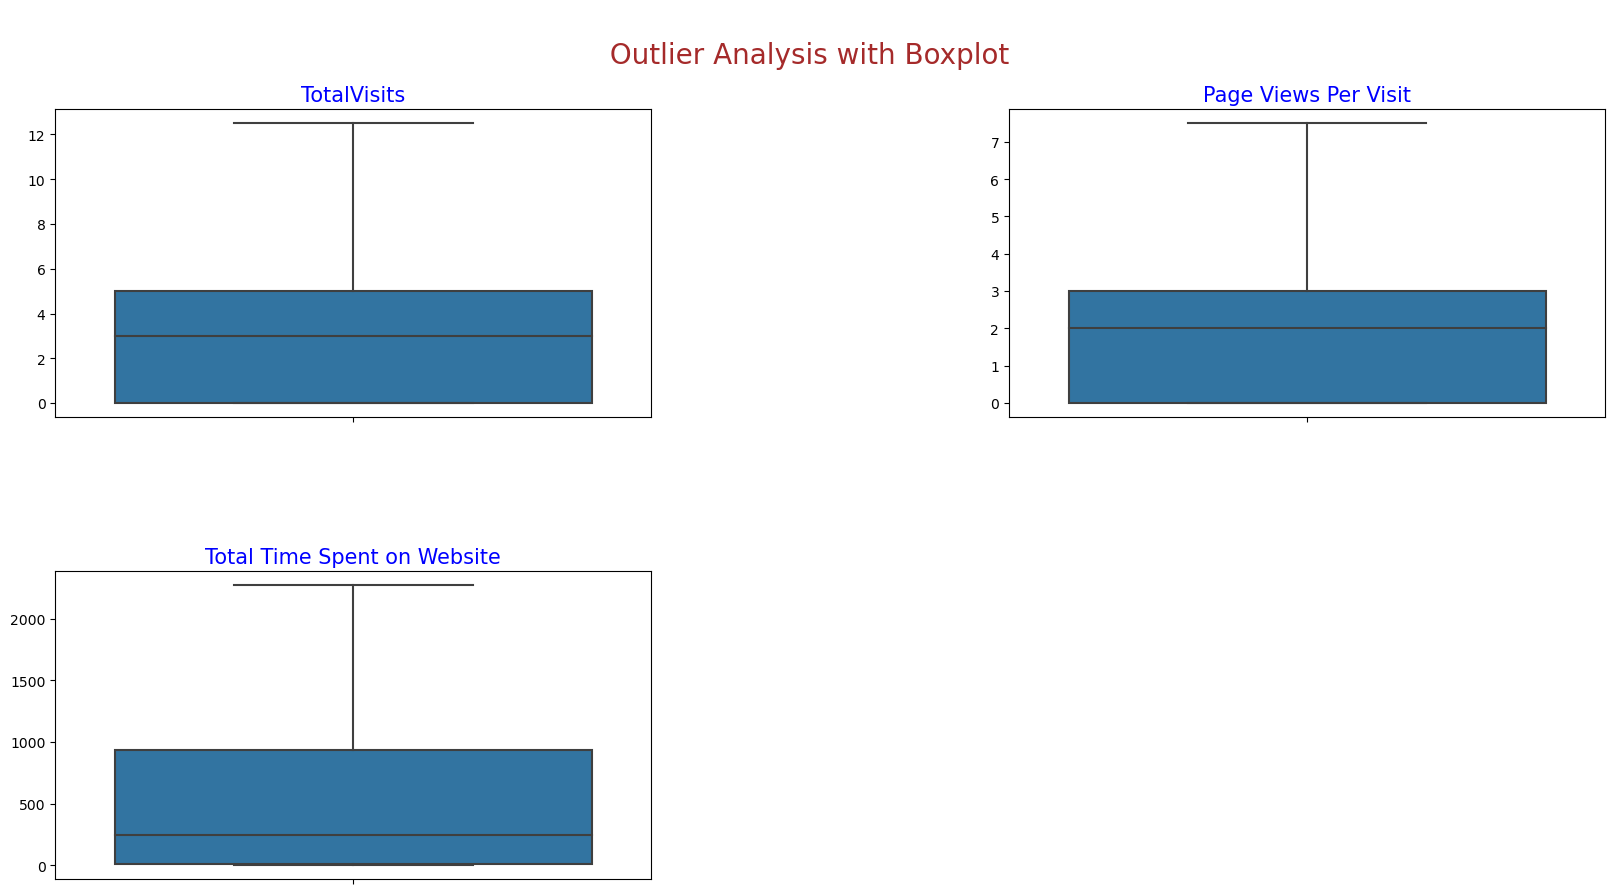

In [337]:
Numerical = ["TotalVisits", "Page Views Per Visit", "Total Time Spent on Website"]
Check_Outliers(l_s, Numerical)

In [338]:
l_s.describe(percentiles=[.10,.25,.50,.75,.95])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.213853                   487.698268   
std       0.486714     3.005136                   548.021466   
min       0.000000     0.000000                     0.000000   
10%       0.000000     0.000000                     0.000000   
25%       0.000000     0.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
95%       1.000000    10.000000                  1562.000000   
max       1.000000    12.500000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.274987  
std                1.917776  
min                0.000000  
10%                0.000000  
25%                0.000000  
50%                2.000000  
75%                3.000000  
95%                6.000000  
max                7.500000

In [339]:
l_s.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

In [340]:
columnsList_cat = ["Lead Source", "Do Not Email", "Last Activity", "Specialization", "What is your current occupation", "A free copy of Mastering The Interview"]


for i in columnsList_cat:
        Percentage = 100*l_s[i].value_counts(normalize = True)
        print("Value % For :",i,"\n")
        print(Percentage,"\n")
        print("-><-"*30,"\n")

Value % For : Lead Source 

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64 

-><--><--><--><--><--><--><--><--><--><--><--><--><--><--><--><--><--><--><--><--><--><--><--><--><--><--><--><--><--><- 

Value % For : Do Not Email 

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64 

-><--><--><--><--><--><--><--><--><--><--><--><--><--><--><-->

### Grouping of Values with low frequency to "Others"

In [341]:
l_s['Lead Source'] = l_s['Lead Source'].replace(["bing", "Click2call", "Press_Release", "Social Media", "Live Chat", "youtubechannel", "testone", "Pay per Click Ads", "welearnblog_Home", "WeLearn", "blog", "NC_EDM"], "Others")

In [342]:
l_s["Lead Source"].value_counts(normalize = True)*100

Google              31.428571
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
google               0.054113
Name: Lead Source, dtype: float64

In [343]:
l_s['Last Activity'] = l_s['Last Activity'].replace(['Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 'Approached upfront','View in browser link Clicked', 'Email Marked Spam', 'Email Received', 'Visited Booth in Tradeshow', 'Resubscribed to emails'],'Others')

In [344]:
l_s['Lead Source'] = l_s['Lead Source'].replace("google", "Google")

In [345]:
l_s["Lead Source"].value_counts(normalize = True)*100

Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: Lead Source, dtype: float64

In [346]:
l_s['Last Activity'].value_counts(normalize = True)*100

Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: Last Activity, dtype: float64

### Mapping Yes/No with binary numbers 1/0

In [347]:
l_s['Do Not Email'] = l_s['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

In [348]:
l_s['A free copy of Mastering The Interview'] = l_s['A free copy of Mastering The Interview'].apply(lambda x: 1 if x =='Yes' else 0)

In [349]:
l_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   int6

# **Exploratory Data Analysis**

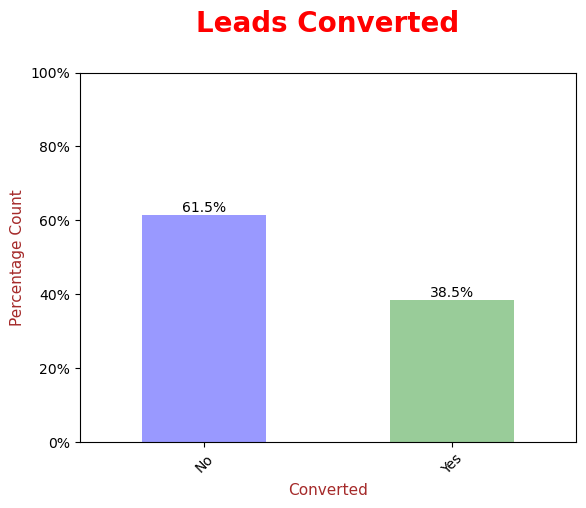

In [350]:
EDA=(100*l_s["Converted"].value_counts(normalize = True)).plot.bar(color=["Blue", "Green"], alpha = 0.4)


plt.title("Leads Converted\n", fontdict = {'fontsize': 20, 'fontweight' : "bold", 'color' : 'Red'})



plt.xlabel('Converted', fontdict = {'fontsize': 11, 'fontweight' : 22, 'color' : 'Brown'})
plt.ylabel("Percentage Count", fontdict = {'fontsize': 11, 'fontweight' : 22, 'color' : 'Brown'})



Vert = np.arange(0,101,20)
Set = ["{:.0f}%".format(i) for i in Vert] 
plt.yticks(Vert, Set)


plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation = 45)

for p in EDA.patches:
    EDA.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
plt.show()

### **Converted** is the targeted value here. As we can observe, the converted value is 38.5%.

In [351]:
# Finding out the imbalance ratio
IR = (l_s["Converted"].value_counts(normalize = True).loc[0])/(l_s["Converted"].value_counts(normalize = True).loc[1])
print("Imbalance Ratio : {:.2f} : {}".format(IR, 1))

Imbalance Ratio : 1.59 : 1


## Univariate & Bivariate Analysis

In [352]:
CS = ["Lead Origin", "Lead Source", "Do Not Email", "Last Activity", "Specialization", "What is your current occupation", "A free copy of Mastering The Interview"]

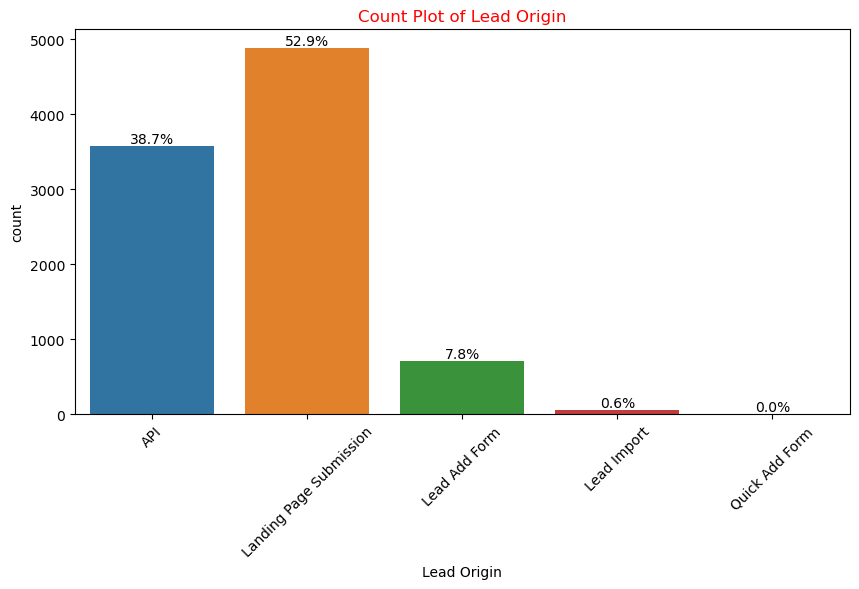

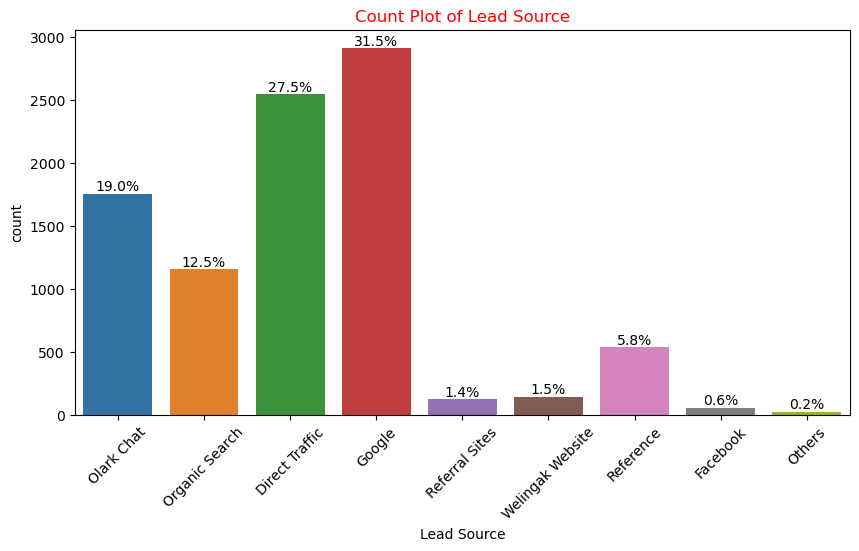

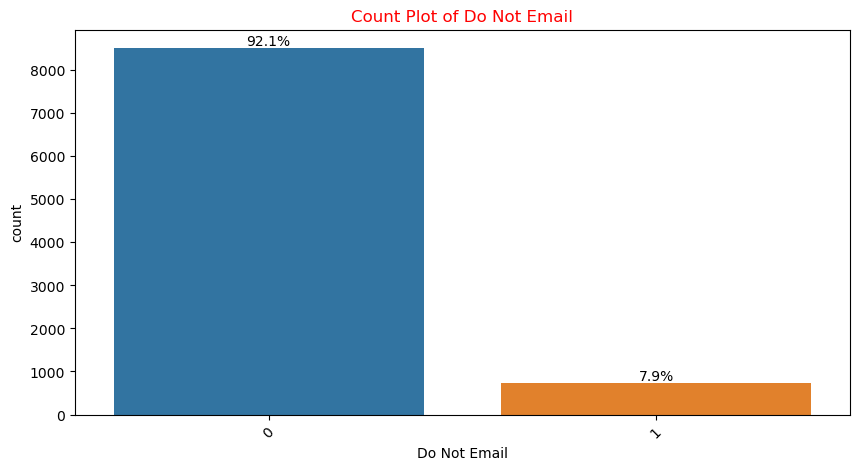

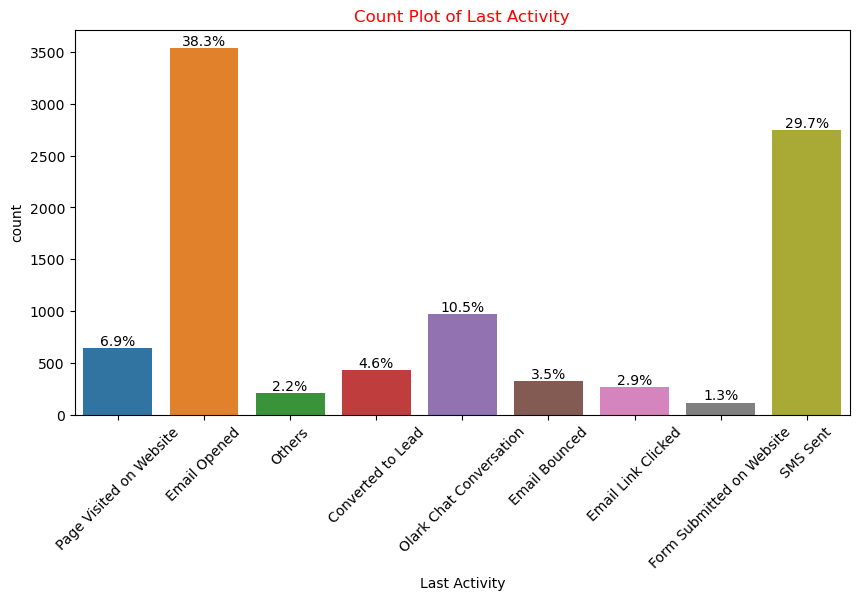

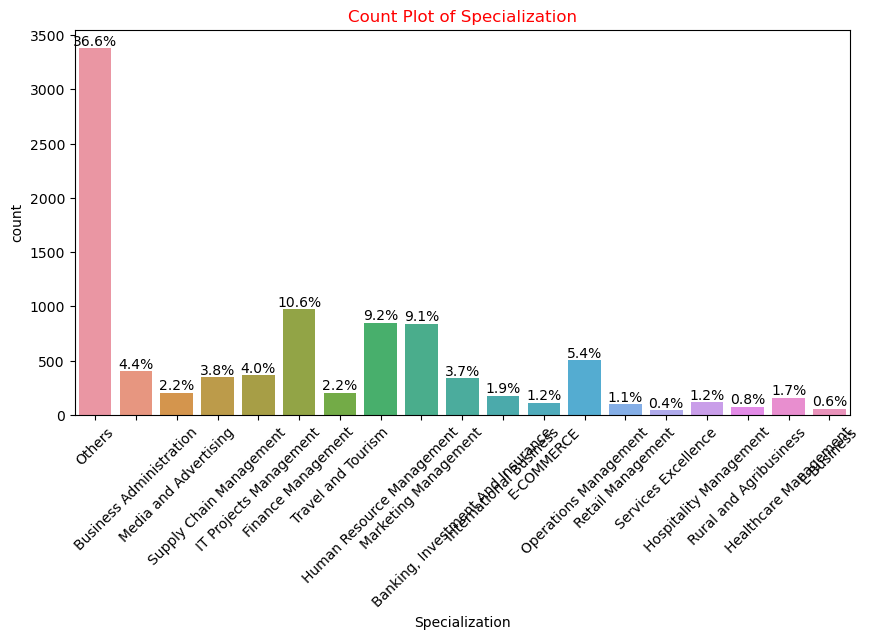

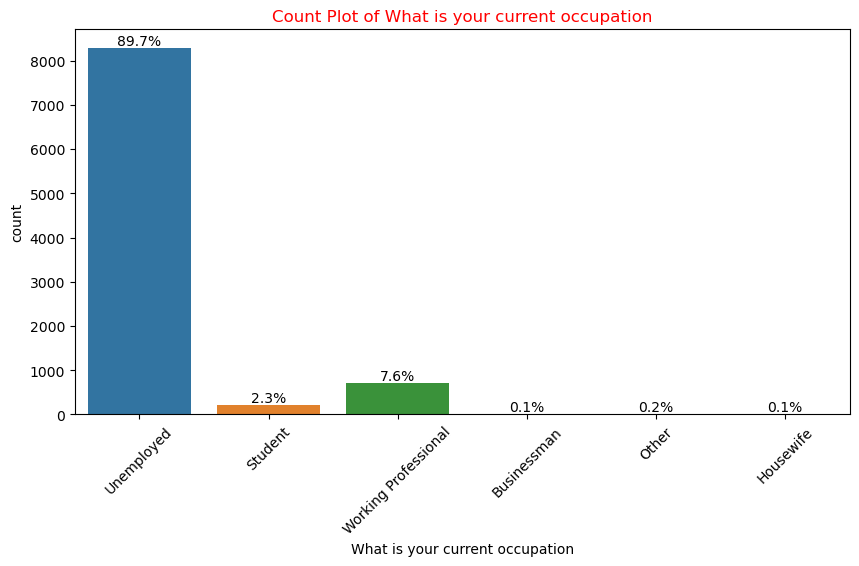

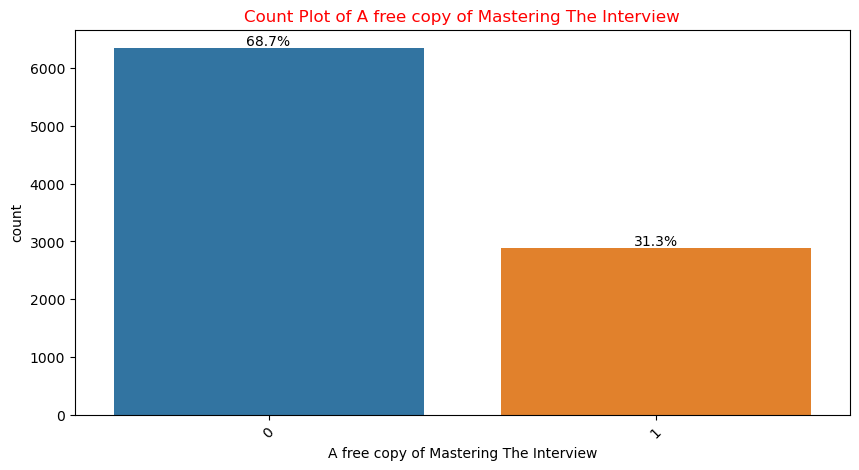

In [353]:
for i in CS[:7]:
    
    plt.figure(figsize = [10,5])
    plt.title("Count Plot of {}".format(i),color = "Red")
    EDA = sns.countplot(x = i, data = l_s)
    Total = len(l_s[i])
    plt.xticks(rotation = 45)
    
    for p in EDA.patches:
        text = '{:.1f}%'.format(100*p.get_height()/Total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        EDA.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

## Bivariate Analysis for Categorical Data

In [354]:
def BC(df, variable_name, Target = "Converted"):
    plt.figure(figsize = (20,6))
    plt.suptitle("{} Count vs Lead Conversion %".format(variable_name), color = "Red", fontsize = 20)
    
    
    
    plt.subplot(1,2,1)
    plt.title("Distribution of {}".format(variable_name), color = "blue")
    EDA=sns.countplot(x = variable_name, hue = Target, data = l_s, palette = "Spectral_r", alpha = 0.5)
    
    Total = len(l_s[variable_name])
    plt.xticks(rotation = 90)
    plt.legend(["No", "Yes"], title = "Converted")
    
    
          
    for p in EDA.patches:
        Text = '{:.1f}%'.format(100*p.get_height()/Total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        EDA.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

   

    plt.subplot(1,2,2)
    plt.title("Lead Conversion % of {}".format(variable_name), color = "Red", fontsize = 12)
    EDA=sns.countplot(x = variable_name, hue = Target, data = df, palette = "BuPu", alpha = 0.5)   
    
    
   
    plt.xticks(rotation = 90)
    plt.ylabel("Count", color = 'brown')
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels = ["Not Converted", "Converted"], title = "Lead Conversion %")
    
    
    all_heights = [[p.get_height() for p in bars] for bars in EDA.containers]
    for bars in EDA.containers:
        for i, p in enumerate(bars):
            Total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / Total) :.1f}%'
            EDA.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size = 11, ha='center', va='bottom')

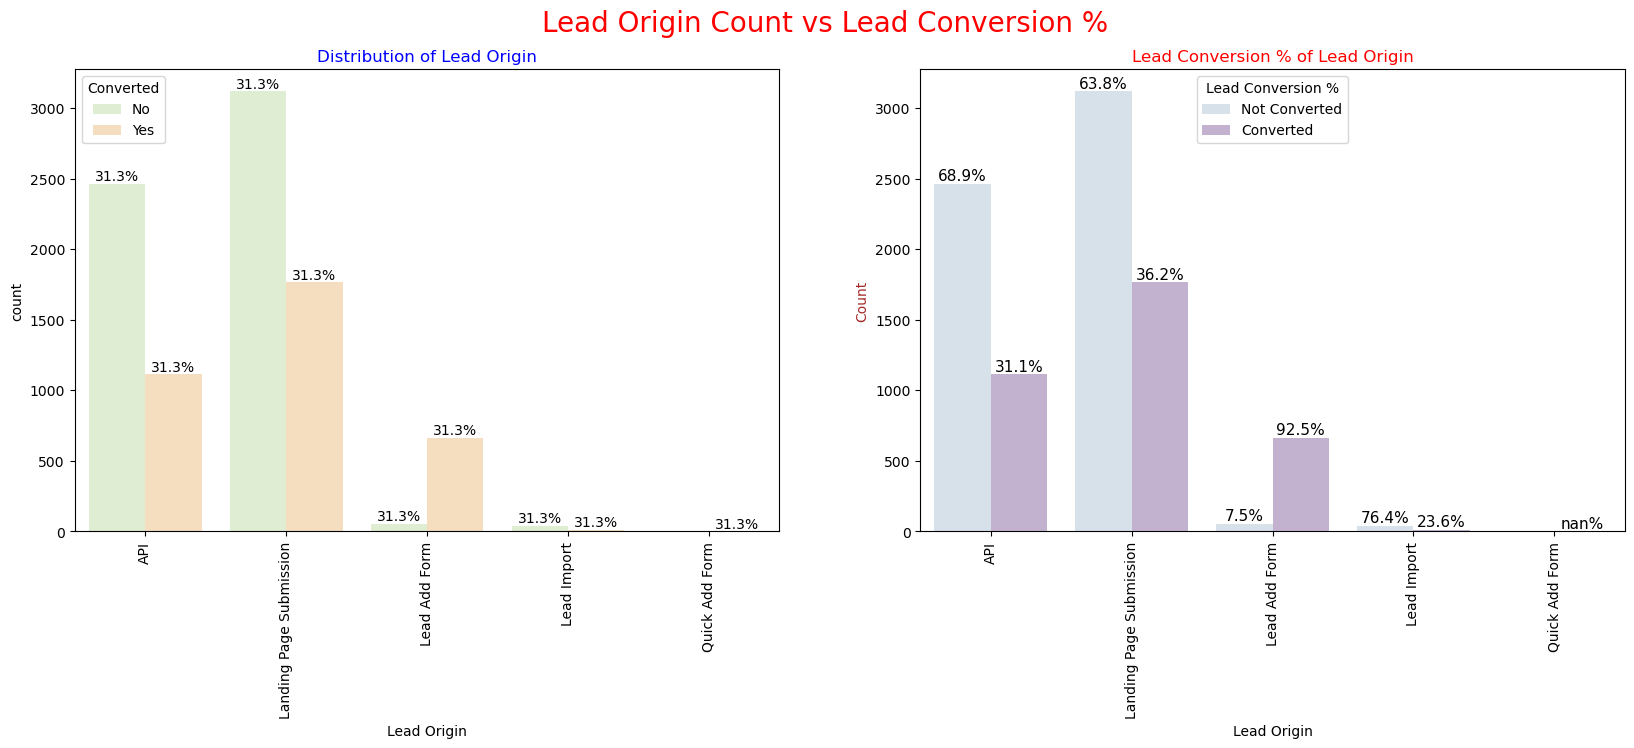

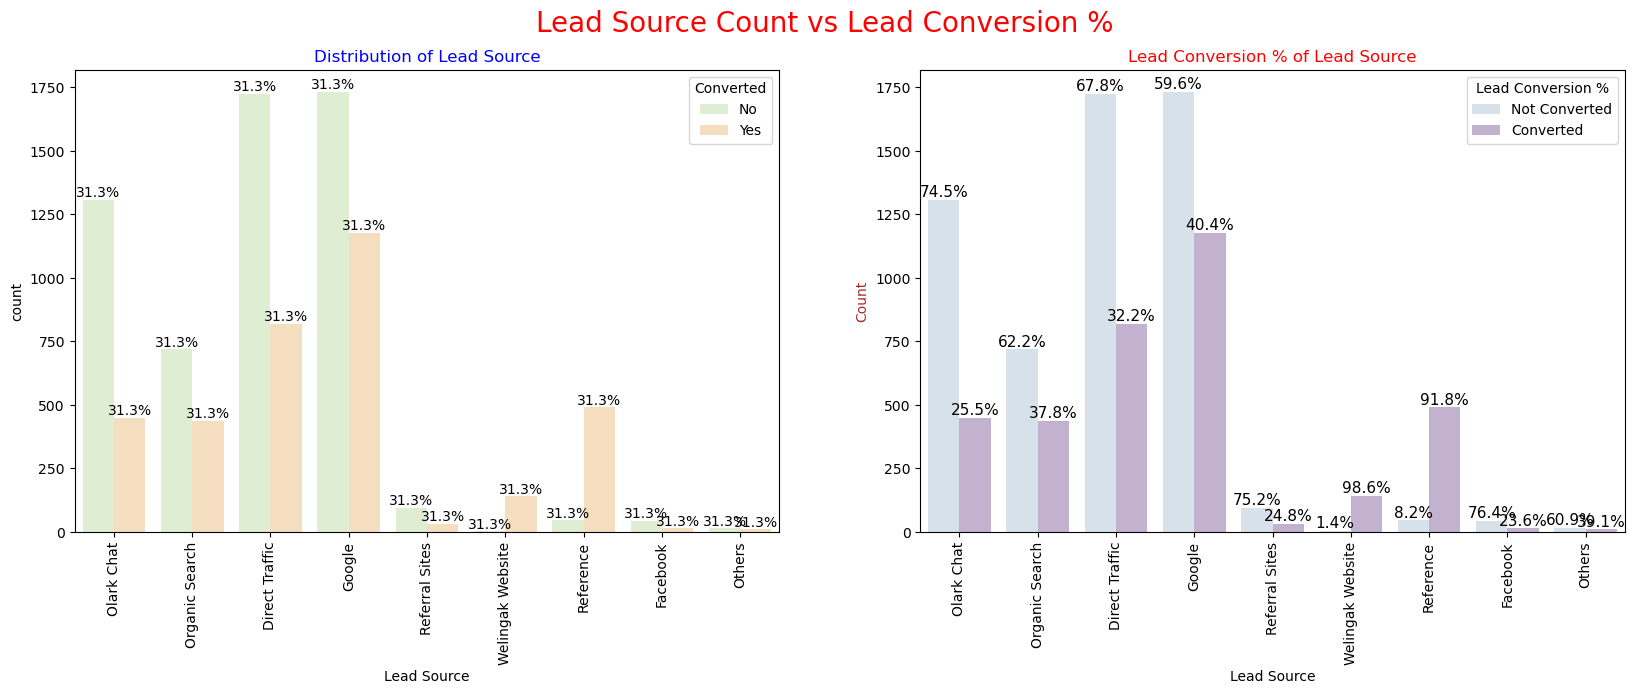

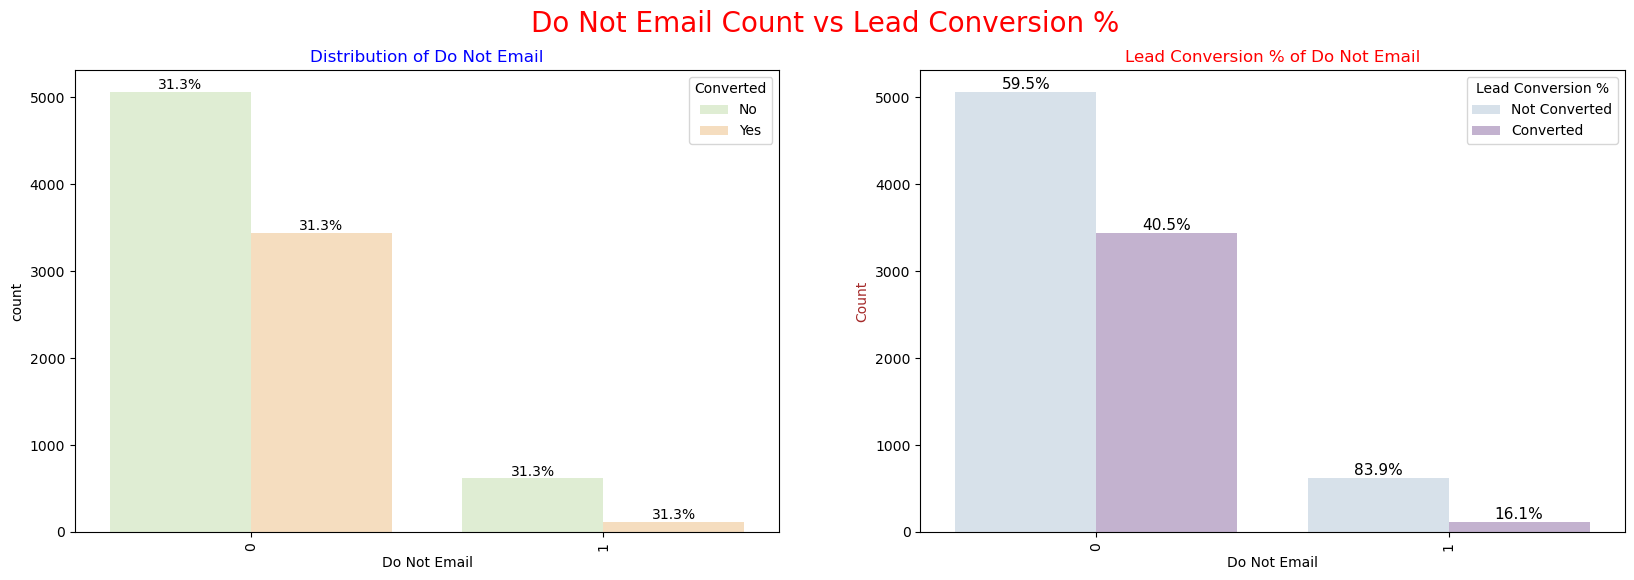

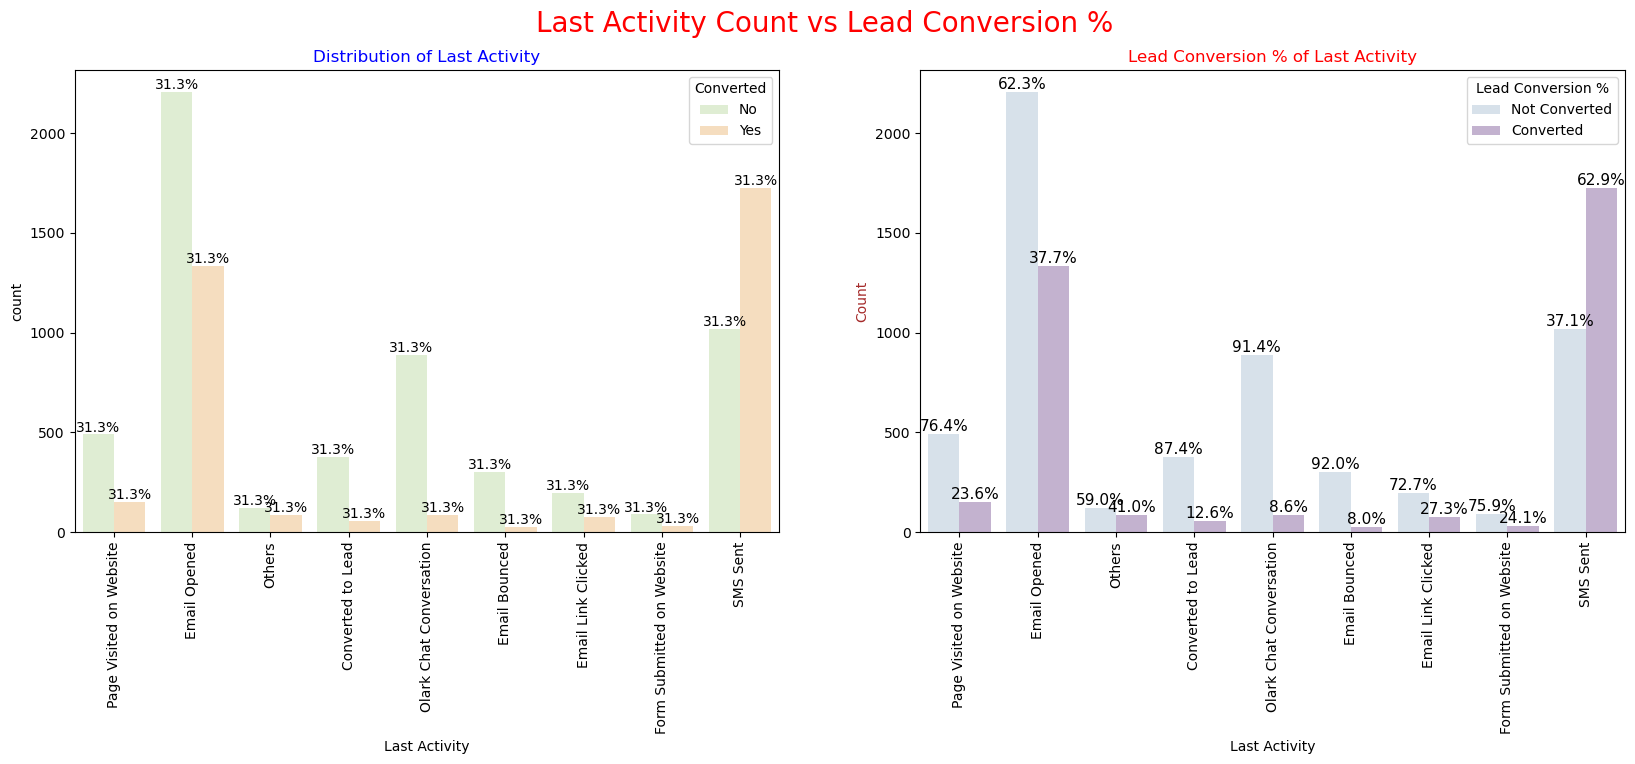

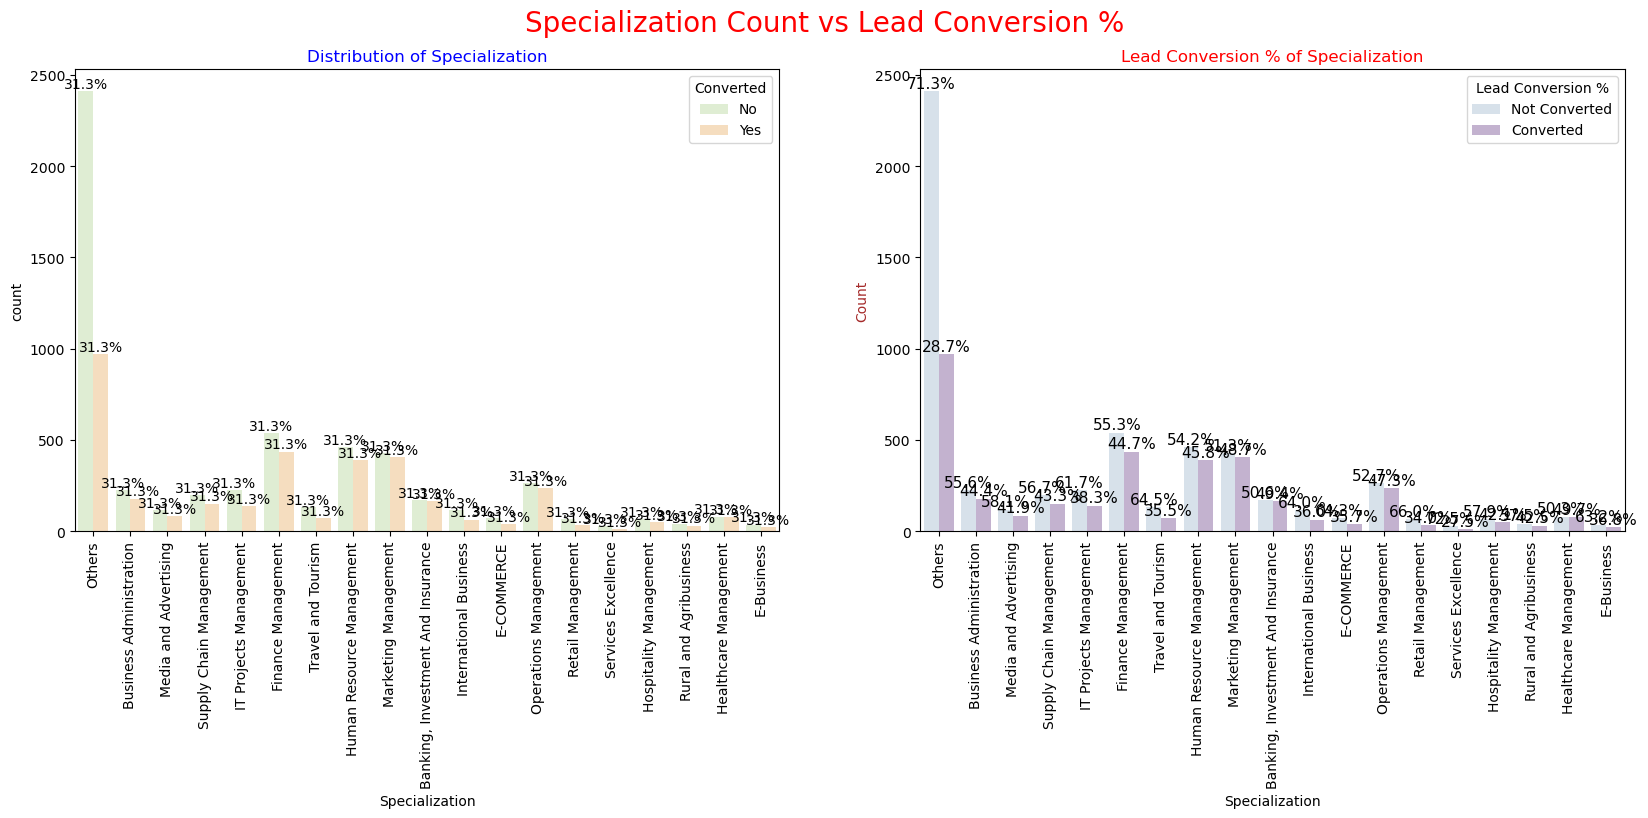

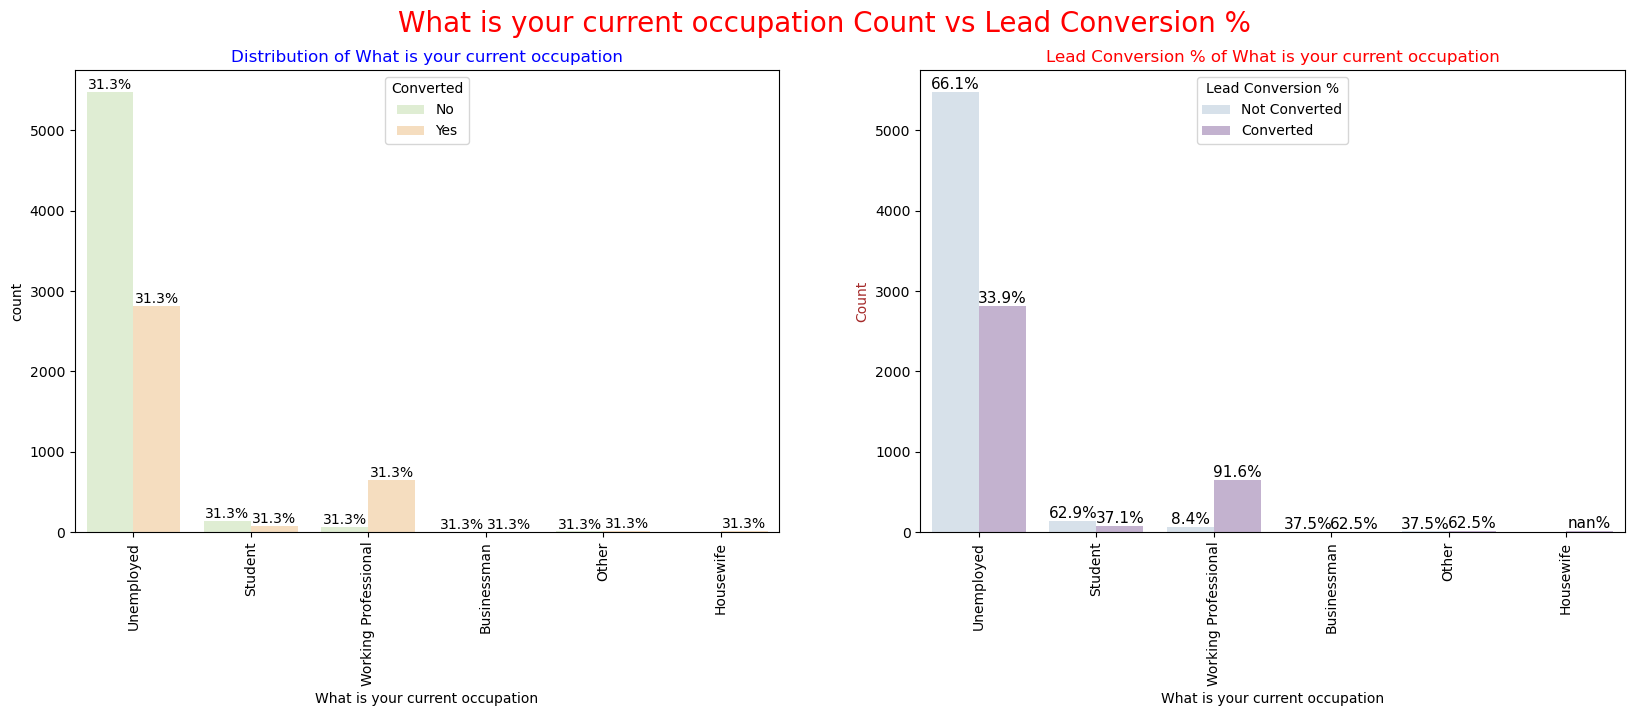

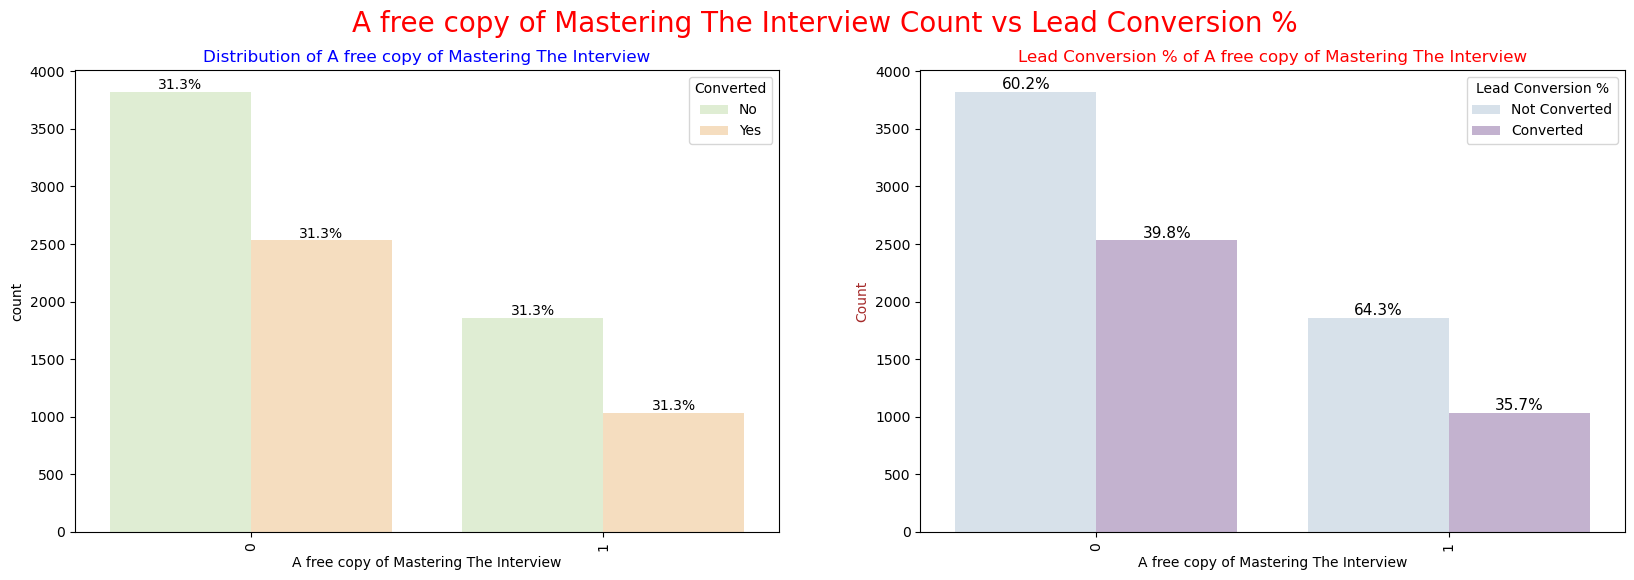

In [355]:
CS = ["Lead Origin", "Lead Source", "Do Not Email", "Last Activity", "Specialization", "What is your current occupation", "A free copy of Mastering The Interview"]

for i in CS:
    BC(l_s, variable_name=i)
    

### Inferences
1. LEAD ORIGIN
- API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
- Lead Add Form has more than 90% conversion rate but count of lead are not very high.
- Lead Import are very less in count.

To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

2. LEAD SOURCE
- Focus should be on improving lead conversion of olark chat, organic search, direct traffic, and google leads, as well as generate more leads from reference and welingak website.

3. LAST ACTIVITY
- Most of the lead have their Email opened as their last activity. Lead conversion from SMS sent is also high, more than 60%.

4. WHAT IS YOUR CURRENT OCCUPATION
- Working Professionals going for the course have high chances of joining it.
- Unemployed leads are the most in numbers but has around 30-35% conversion rate.
Thus, focus should be on working professionals to improve lead conversion rate.

## Bivariate Analysis for Numerical Data

<Figure size 1600x400 with 0 Axes>

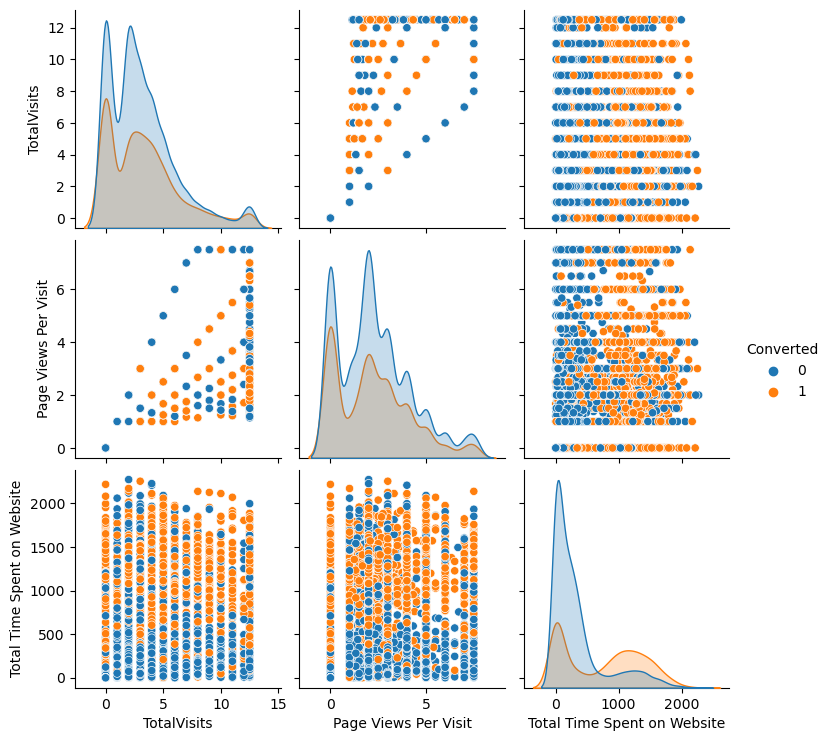

In [356]:
plt.figure(figsize=(16, 4))
sns.pairplot(data = l_s, vars = OC, hue = "Converted")                                  
plt.show()

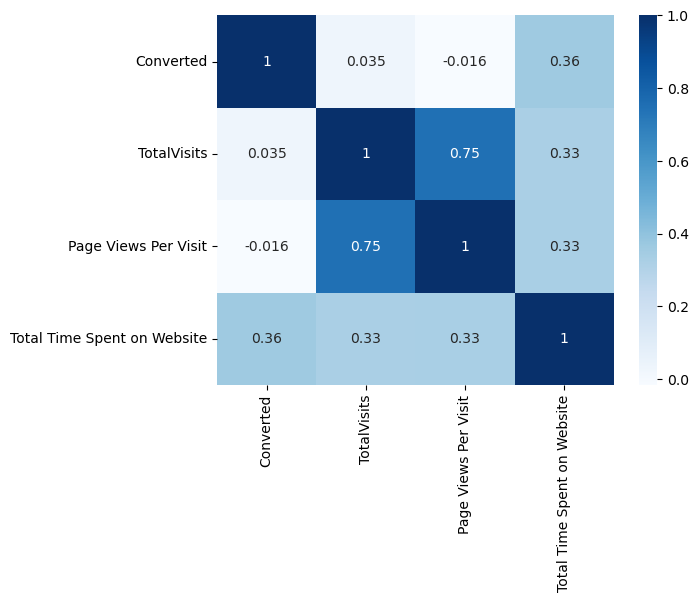

In [357]:
OC = ['Converted','TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
sns.heatmap(data= l_s[OC].corr(), cmap = "Blues", annot = True)
plt.show()

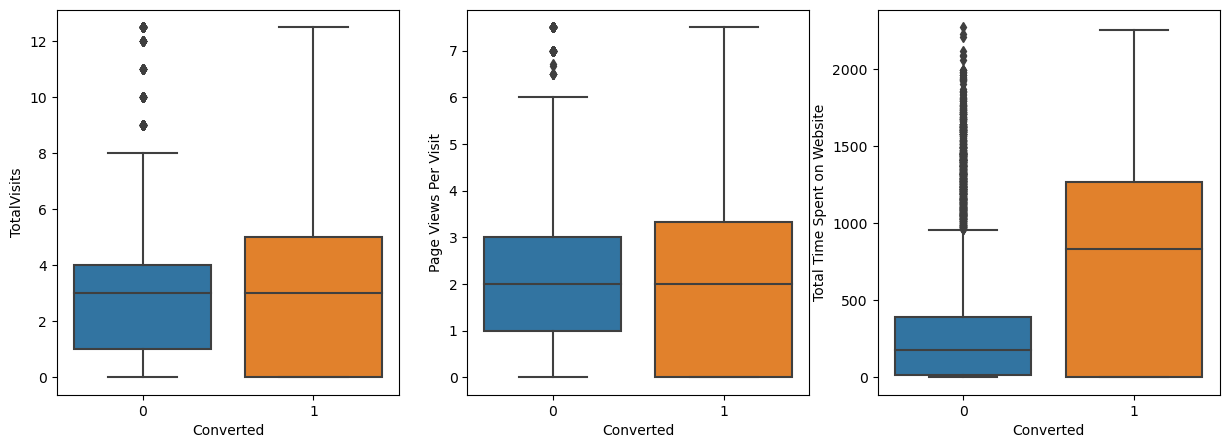

In [358]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = l_s)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = l_s)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = l_s)
plt.show()

## Creating Dummy Variables 

In [359]:
dummy_data = pd.get_dummies(l_s[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation']], drop_first = True)

dummy_data.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           0                     0   
3                        0                           0                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
3                                      0                     1   
4                                      0                     0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   Specialization_Business Administration  Specialization_E-Business  \
0                                       0                          0   
1                                       0                          0   
2                                       1                          0   
3                           

### Concatenating the dummy data with Lead data

In [360]:
l_s = pd.concat([l_s, dummy_data], axis=1)
l_s.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3                   Others    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation  A free copy of Mastering The Interview  \
0                      Unemployed                                       0   
1                      Unemployed                                       0   
2                         Student                                       1   
3                      Unemployed                                       0   
4                      Unemployed                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           0                     0   
3                        0                           0                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0         

### Now, we drop the columns for which dummies were created

In [361]:
l_s = l_s.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation'], axis = 1)

In [362]:
l_s.head()

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
0             0          0          0.0                            0   
1             0          0          5.0                          674   
2             0          1          2.0                         1532   
3             0          0          1.0                          305   
4             0          1          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           0                     0   
3                        0                           0                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
3                     

# **Splitting of Data: Train and Test**

In [363]:
X = l_s.drop('Converted', axis=1)


y = l_s["Converted"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

print("X_train:", X_train.shape,"\ny_train:",y_train.shape)

X_train: (6468, 48) 
y_train: (6468,)


In [364]:
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_test: (2772, 48) 
y_test: (2772,)


## Scaling Feature

In [365]:
scaler = StandardScaler()

OC=X_train.select_dtypes(include=['int64','float64']).columns

X_train[OC] = scaler.fit_transform(X_train[OC])


X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
1871     -0.291638    -1.064974                    -0.885371   
6795     -0.291638     0.262370                     0.005716   
3516     -0.291638     0.594206                    -0.691418   
8105     -0.291638     0.594206                     1.365219   
3934     -0.291638    -1.064974                    -0.885371   

      Page Views Per Visit  A free copy of Mastering The Interview  \
1871             -1.184892                               -0.673169   
6795             -0.488713                                1.485511   
3516              0.123715                               -0.673169   
8105              1.432322                               -0.673169   
3934             -1.184892                               -0.673169   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1871                                    0                          0   
6795                                    1                          0   
3516                                    0                          0   
8105                                    1                          0   
3934                                    0                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
1871                        0                           0   
6795                        0                           0   
3516                        0                           0   
8105                        0                           0   
3934                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
1871                     0                   0                       1   
6795                     0                   0                       0   
3516                     0                   0                       1   
8105                     0                   1                       0   
3934                     0                   0                       1   

      Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
1871                           0                   0                      0   
6795                           0                   0                      0   
3516                           0                   0                      0   
8105                           0                   0                      0   
3934                           0                   0                      0   

      Lead Source_Referral Sites  Lead Source_Welingak Website  \
1871                           0                             0   
6795                           0                             0   
3516                           0                             0   
8105                           0                             0   
3934                           0                             0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
1871                            0                                 0   
6795                            0                                 0   
3516                            0                                 0   
8105                            0                                 0   
3934                            0                                 0   

      Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
1871                           1                                        0   
6795                           1                                        0   
3516                           1                                        0   
8105                           0                                        0   
3934                           1                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
1871                                      0                     0   
6795                                      0            

In [366]:
LCR = (sum(l_s['Converted'])/len(l_s['Converted'].index))*100
LCR

38.53896103896104

## Correlation Analysis

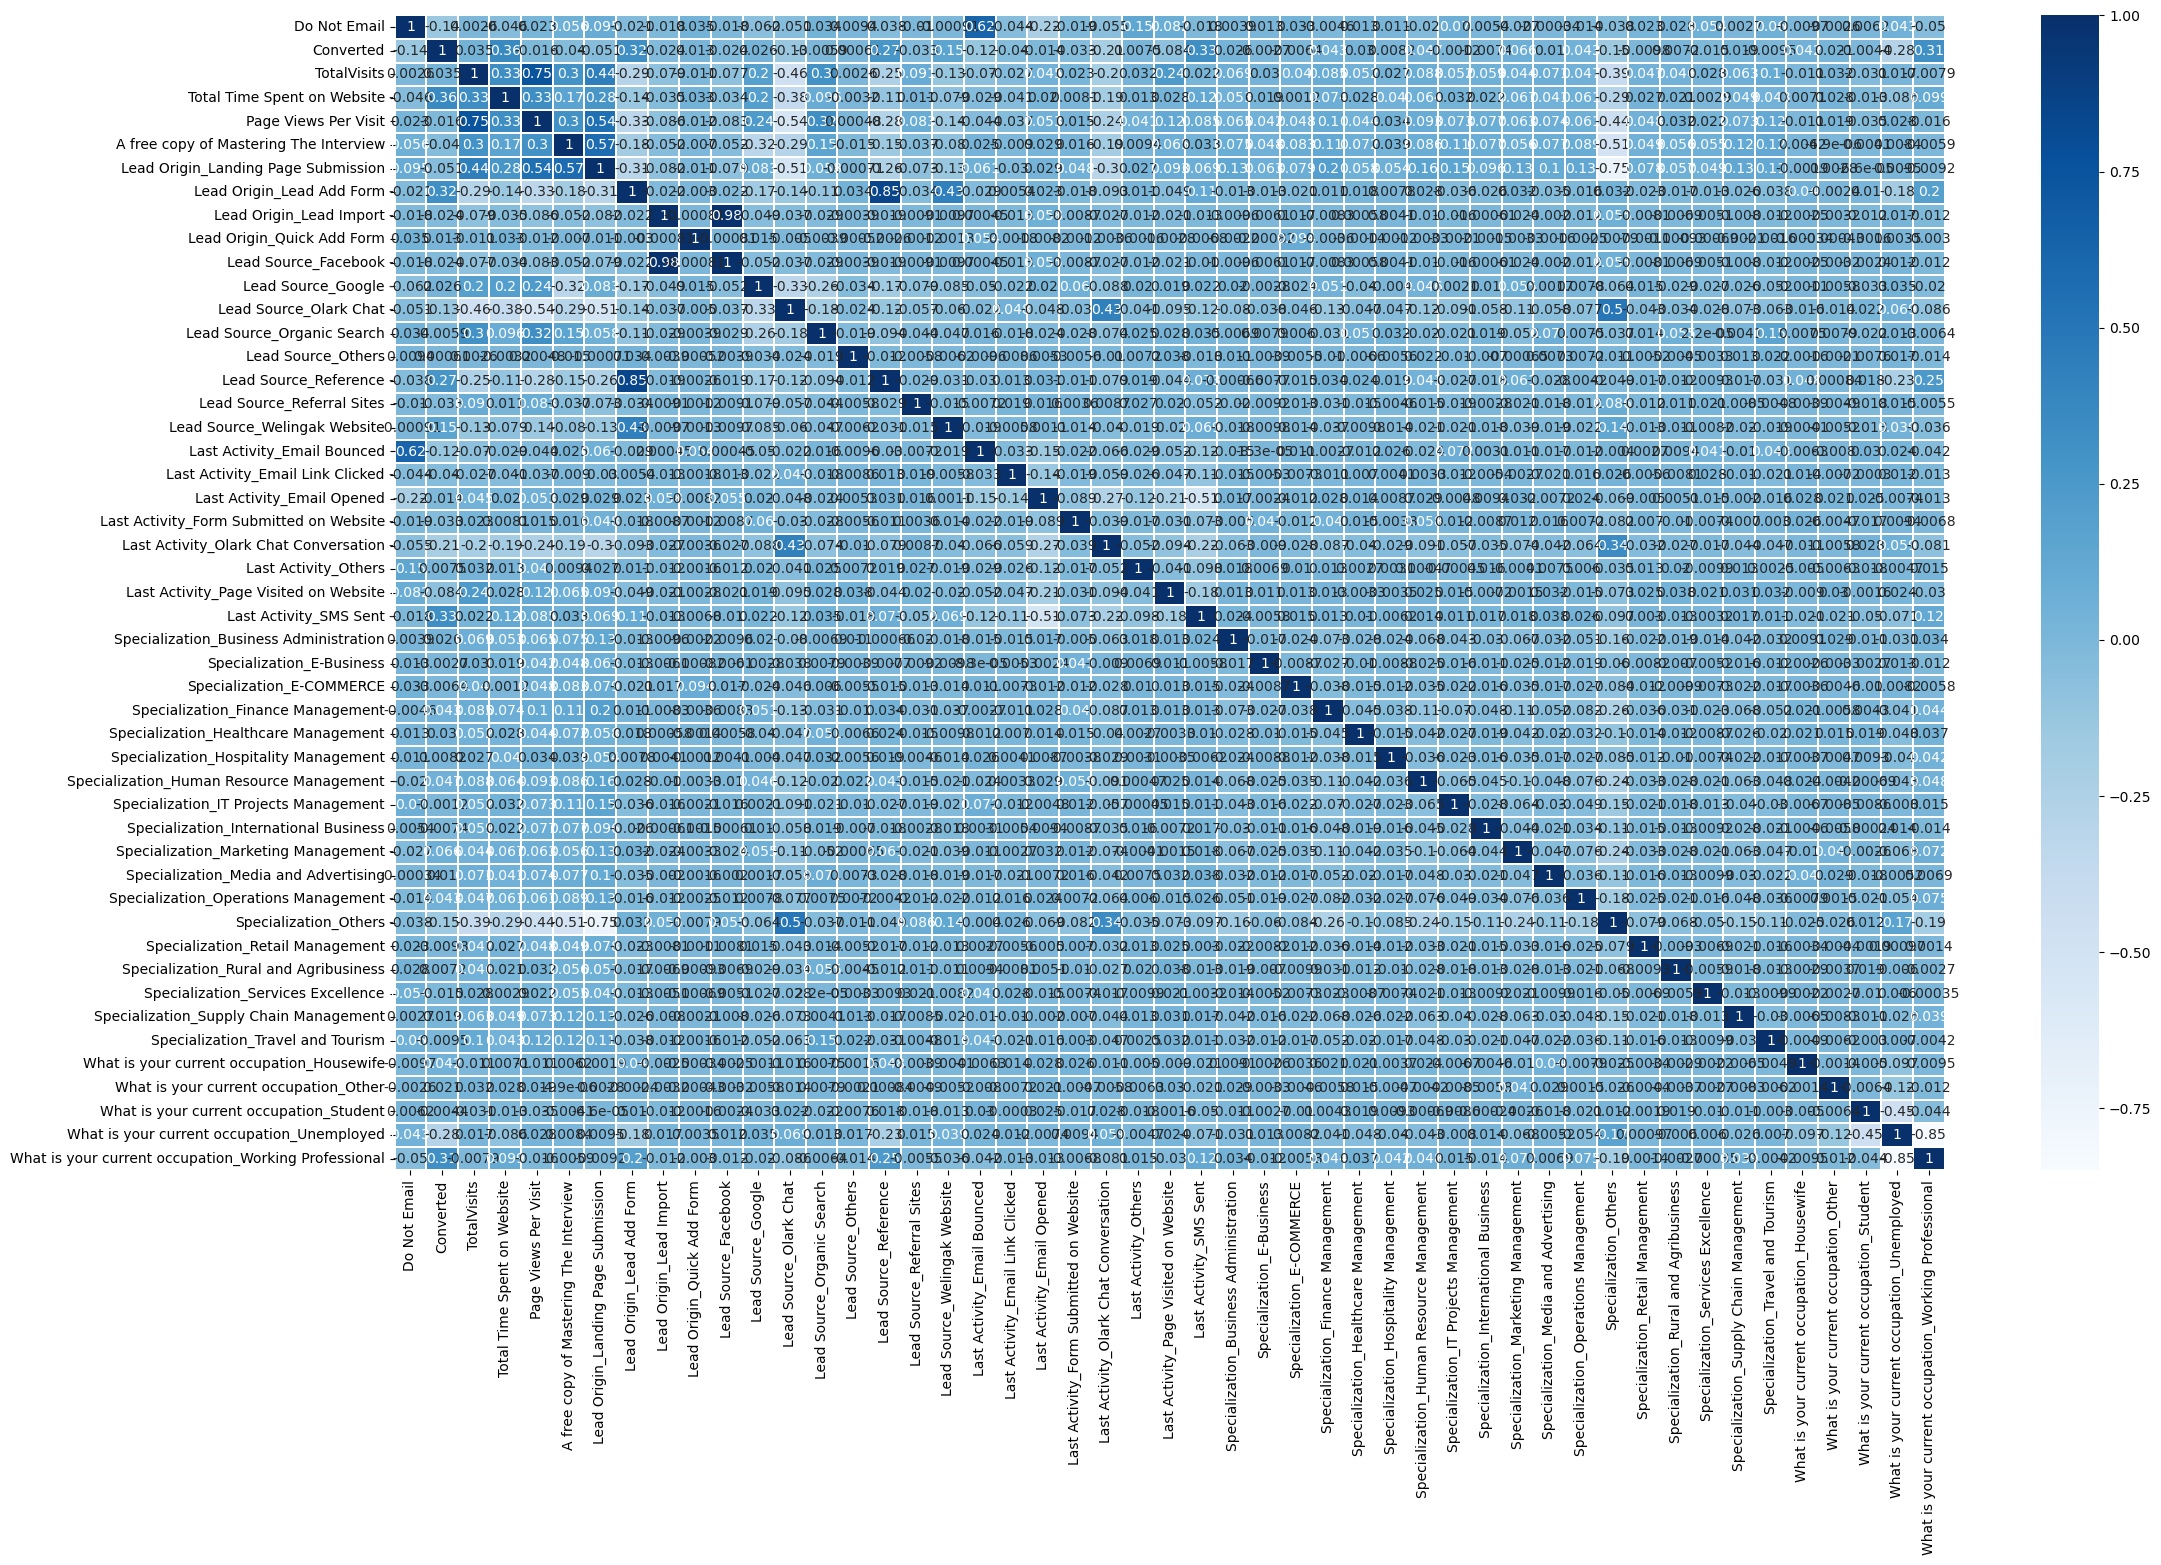

In [367]:
plt.figure(figsize = (25,15))        
sns.heatmap(l_s.corr(),linewidths=0.09,cmap="Blues",annot=True)
plt.show()

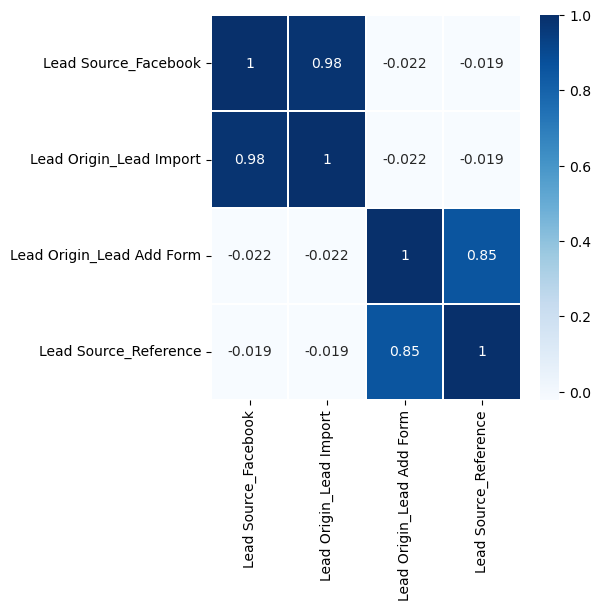

In [368]:
plt.figure(figsize = (5,5))        
sns.heatmap(l_s[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

In [369]:
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

## RFE Feature Selection

The RFE feature selection method is a process that fits a model and removes the weakest feature (or features) until the specified number of features is reached. This will be our next step.

In [370]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 11),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('A free copy of Mastering The Interview', False, 18),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 19),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 24),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 14),
 ('Last Activity_Email Link Clicked', False, 6),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 29),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Busi

In [371]:
rfe.support_

array([False, False,  True, False, False,  True, False,  True, False,
        True, False,  True,  True, False,  True, False, False,  True,
       False,  True,  True, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
        True])

In [372]:
# Getting a ranking of features chosen
Ranking=pd.DataFrame()
Ranking['features']=X_train.columns
Ranking['Feature Chosen'] = rfe.support_
Ranking['Ranking']=rfe.ranking_
Ranking.sort_values(by='Ranking')

features  Feature Chosen  Ranking
22                             Last Activity_SMS Sent            True        1
41          What is your current occupation_Housewife            True        1
35                              Specialization_Others            True        1
28              Specialization_Hospitality Management            True        1
20                               Last Activity_Others            True        1
19              Last Activity_Olark Chat Conversation            True        1
17                         Last Activity_Email Opened            True        1
14                       Lead Source_Welingak Website            True        1
12                              Lead Source_Reference            True        1
11                                 Lead Source_Others            True        1
45  What is your current occupation_Working Profes...            True        1
9                              Lead Source_Olark Chat            True        1
7                                Lead Source_Facebook            True        1
5                 Lead Origin_Landing Page Submission            True        1
2                         Total Time Spent on Website            True        1
44         What is your current occupation_Unemployed           False        2
42              What is your current occupation_Other           False        3
43            What is your current occupation_Student           False        4
37              Specialization_Rural and Agribusiness           False        5
16                   Last Activity_Email Link Clicked           False        6
31              Specialization_International Business           False        7
36                   Specialization_Retail Management           False        8
1                                         TotalVisits           False        9
3                                Page Views Per Visit           False       10
0                                        Do Not Email           False       11
21              Last Activity_Page Visited on Website           False       12
23             Specialization_Business Administration           False       13
15                        Last Activity_Email Bounced           False       14
34               Specialization_Operations Management           False       15
29           Specialization_Human Resource Management           False       16
32                Specialization_Marketing Management           False       17
4              A free copy of Mastering The Interview           False       18
6                          Lead Origin_Quick Add Form           False       19
38                 Specialization_Services Excellence           False       20
39             Specialization_Supply Chain Management           False       21
8                                  Lead Source_Google           False       22
25                          Specialization_E-COMMERCE           False       23
13                         Lead Source_Referral Sites           False       24
30              Specialization_IT Projects Management           False       25
27               Specialization_Healthcare Management           False       26
26                  Specialization_Finance Management           False       27
10                         Lead Source_Organic Search           False       28
18            Last Activity_Form Submitted on Website           False       29
33               Specialization_Media and Advertising           False       30
24                          Specialization_E-Business           False       31
40                  Specialization_Travel and Tourism           False       32

In [373]:
cols = X_train.columns[rfe.support_]
cols

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [374]:
#Preparing model
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

## Model Building
- H0: Conversion is not impacted by X's
- Ha: Conversion is impacted by X's

### Model 1

In [375]:
rfe_col=X_train.columns[rfe.support_]


X_train_rfe = X_train[rfe_col]


X_train_sm1 = sm.add_constant(X_train_rfe)


logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()  

logm1.params

const                                                   -1.033284
Total Time Spent on Website                              1.050544
Lead Origin_Landing Page Submission                     -1.272090
Lead Source_Facebook                                    -0.696059
Lead Source_Olark Chat                                   0.900083
Lead Source_Others                                       0.980708
Lead Source_Reference                                    2.897685
Lead Source_Welingak Website                             5.380227
Last Activity_Email Opened                               0.950623
Last Activity_Olark Chat Conversation                   -0.553411
Last Activity_Others                                     1.258012
Last Activity_SMS Sent                                   2.068763
Specialization_Hospitality Management                   -1.072037
Specialization_Others                                   -1.193681
What is your current occupation_Housewife               23.022209
What is yo

In [376]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2732.8
Date:                Tue, 26 Dec 2023   Deviance:                       5465.5
Time:                        22:51:26   Pearson chi2:                 8.09e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3839
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0333      0.144     -7.155      0.000      -1.316      -0.750
Total Time Spent on Website                              1.0505      0.039     27.169      0.000       0.975       1.126
Lead Origin_Landing Page Submission                     -1.2721      0.126    -10.059      0.000      -1.520      -1.024
Lead Source_Facebook                                    -0.6961      0.529     -1.316      0.188      -1.733       0.340
Lead Source_Olark Chat                                   0.9001      0.119      7.585      0.000       0.668       1.133
Lead Source_Others                                       0.9807      0.512      1.915      0.056      -0.023       1.985
Lead Source_Reference                                    2.8977      0.216     13.434      0.000       2.475       3.320
Lead Source_Welingak Website                             5.3802      0.729      7.384      0.000       3.952       6.808
Last Activity_Email Opened                               0.9506      0.105      9.061      0.000       0.745       1.156
Last Activity_Olark Chat Conversation                   -0.5534      0.187     -2.956      0.003      -0.920      -0.186
Last Activity_Others                                     1.2580      0.238      5.276      0.000       0.791       1.725
Last Activity_SMS Sent                                   2.0688      0.108     19.188      0.000       1.857       2.280
Specialization_Hospitality Management                   -1.0720      0.324     -3.310      0.001      -1.707      -0.437
Specialization_Others                                   -1.1937      0.121     -9.841      0.000      -1.431      -0.956
What is your current occupation_Housewife               23.0222   1.33e+04      0.002      0.999    -2.6e+04     2.6e+04
What is your current occupation_Working Professional     2.6855      0.190     14.104      0.000       2.312       3.059
========================================================================================================================
"""

### Inference:
P is high and hence H0 is true - i.e., Conversion is not impacted by "What is your current occupation_Housewife"
Hence, we can drop "What is your current occupation_Housewife"

In [377]:
rfe_col=rfe_col.drop("What is your current occupation_Housewife")

### Model 2

In [378]:
X_train_rfe = X_train[rfe_col]


X_train_sm2 = sm.add_constant(X_train_rfe)


logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()  

logm2.params

const                                                  -1.025075
Total Time Spent on Website                             1.049364
Lead Origin_Landing Page Submission                    -1.267369
Lead Source_Facebook                                   -0.696913
Lead Source_Olark Chat                                  0.899051
Lead Source_Others                                      0.973897
Lead Source_Reference                                   2.917123
Lead Source_Welingak Website                            5.379144
Last Activity_Email Opened                              0.949036
Last Activity_Olark Chat Conversation                  -0.558345
Last Activity_Others                                    1.248172
Last Activity_SMS Sent                                  2.058828
Specialization_Hospitality Management                  -1.079528
Specialization_Others                                  -1.197801
What is your current occupation_Working Professional    2.677350
dtype: float64

In [379]:
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2740.3
Date:                Tue, 26 Dec 2023   Deviance:                       5480.7
Time:                        22:51:35   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3825
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Inference:
P is high for "Lead Source_Facebook" and hence, H0 is true and can be dropped.

In [380]:
rfe_col=rfe_col.drop("Lead Source_Facebook")

### Model 3

In [381]:
X_train_rfe = X_train[rfe_col]


X_train_sm3 = sm.add_constant(X_train_rfe)


logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit() 

logm3.params

const                                                  -1.040542
Total Time Spent on Website                             1.051824
Lead Origin_Landing Page Submission                    -1.249311
Lead Source_Olark Chat                                  0.916940
Lead Source_Others                                      0.981395
Lead Source_Reference                                   2.937179
Lead Source_Welingak Website                            5.396676
Last Activity_Email Opened                              0.943420
Last Activity_Olark Chat Conversation                  -0.558250
Last Activity_Others                                    1.248700
Last Activity_SMS Sent                                  2.055550
Specialization_Hospitality Management                  -1.090368
Specialization_Others                                  -1.194330
What is your current occupation_Working Professional    2.675678
dtype: float64

In [382]:
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.3
Date:                Tue, 26 Dec 2023   Deviance:                       5482.6
Time:                        22:51:43   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3823
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Inference:
P is high for "Lead Source_Others" and hence H0 is true and can be dropped

In [383]:
rfe_col=rfe_col.drop("Lead Source_Others")

### Model 4

In [384]:
X_train_rfe = X_train[rfe_col]

X_train_sm4 = sm.add_constant(X_train_rfe)

logm4 = sm.GLM(y_train,X_train_sm4,family = sm.families.Binomial()).fit()  

logm4.params

const                                                  -1.023594
Total Time Spent on Website                             1.049789
Lead Origin_Landing Page Submission                    -1.258954
Lead Source_Olark Chat                                  0.907184
Lead Source_Reference                                   2.925326
Lead Source_Welingak Website                            5.388662
Last Activity_Email Opened                              0.942099
Last Activity_Olark Chat Conversation                  -0.555605
Last Activity_Others                                    1.253061
Last Activity_SMS Sent                                  2.051879
Specialization_Hospitality Management                  -1.094445
Specialization_Others                                  -1.203333
What is your current occupation_Working Professional    2.669665
dtype: float64

In [385]:
print(logm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.1
Date:                Tue, 26 Dec 2023   Deviance:                       5486.1
Time:                        22:51:54   Pearson chi2:                 8.11e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3819
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Inference:
The above table has P<0.05, and hence Ha will be accepted.

## Checking for Multi Collinearity

In [386]:
get_vif(X_train_rfe)

Features   VIF
0                               Specialization_Others  2.47
1                 Lead Origin_Landing Page Submission  2.45
2                          Last Activity_Email Opened  2.36
3                              Last Activity_SMS Sent  2.20
4                              Lead Source_Olark Chat  2.14
5               Last Activity_Olark Chat Conversation  1.72
6                               Lead Source_Reference  1.31
7                         Total Time Spent on Website  1.24
8   What is your current occupation_Working Profes...  1.21
9                        Lead Source_Welingak Website  1.08
10                               Last Activity_Others  1.08
11              Specialization_Hospitality Management  1.02

### Conclusion:
VIF Values should be less than 5 and hence all Xs can be retained.
Model 4 can be used for evaluation as it meets all our criteria.
We have 12 variables in our Model 4.

# **Model Evaluation**

In [387]:
y_train_pred = logm4.predict(X_train_sm4)           

y_train_pred[:10]

1871    0.474082
6795    0.073252
3516    0.249087
8105    0.768973
3934    0.212973
4844    0.987807
3297    0.108454
8071    0.996128
987     0.169259
7423    0.869641
dtype: float64

In [388]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.47408215, 0.07325161, 0.24908697, 0.7689732 , 0.2129729 ,
       0.9878074 , 0.1084541 , 0.99612765, 0.16925902, 0.86964073])

In [389]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID
0          0        0.474082         1871
1          0        0.073252         6795
2          0        0.249087         3516
3          0        0.768973         8105
4          0        0.212973         3934

In [390]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted
0          0        0.474082         1871          0
1          0        0.073252         6795          0
2          0        0.249087         3516          0
3          0        0.768973         8105          1
4          0        0.212973         3934          0

### Confusion Matrix

In [391]:
CM = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(CM)

[[3588  414]
 [ 846 1620]]


### Accuracy

In [392]:
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.8051948051948052


### Sensitivity & Specificity or Margin of Error

In [393]:
T_P = CM[1,1] # true + 
T_N = CM[0,0] # true -
F_P = CM[0,1] # false +
F_N = CM[1,0] # false -

print("Sensitivity :",T_P / float(T_P + F_N))

Sensitivity : 0.656934306569343


In [394]:
print("Specificity :",T_N / float(T_N + F_P))

Specificity : 0.896551724137931


In [395]:
print("False Positive : ", F_P/ float(T_N + F_P))

False Positive :  0.10344827586206896


In [396]:
print ("Positive Prediction : ", T_P / float(T_P + F_P))

Positive Prediction :  0.7964601769911505


In [397]:
print ("Negative Prediction : ", T_N / float(T_N + F_N))

Negative Prediction :  0.8092016238159675


## ROC Curve

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

- True Positive Rate
- False Positive Rate

In [398]:
def roc1( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

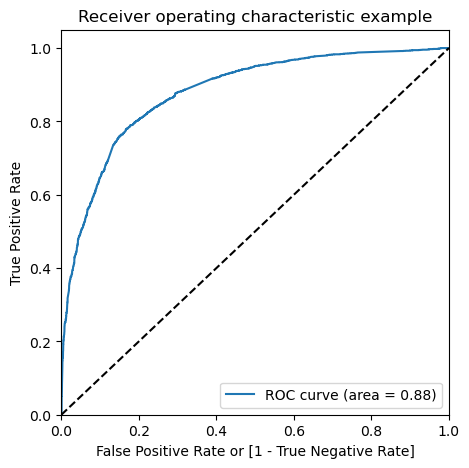

In [399]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

roc1(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

### Inference
Since the area under ROC curve is 0.88 out of 1 which indicates a good predictive model.

### Optimal Cut-off Point

In [400]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.474082         1871          0    1    1    1    1    1   
1          0        0.073252         6795          0    1    0    0    0    0   
2          0        0.249087         3516          0    1    1    1    0    0   
3          0        0.768973         8105          1    1    1    1    1    1   
4          0        0.212973         3934          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    0    0  
4    0    0    0    0    0

In [401]:
cutoff = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff.loc[i] =[ i , Accuracy, Sensitivity, Specificity]
print(cutoff)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.381262     1.000000     0.000000
0.1          0.1  0.595702     0.973642     0.362819
0.2          0.2  0.721243     0.920114     0.598701
0.3          0.3  0.791280     0.832928     0.765617
0.4          0.4  0.813698     0.763585     0.844578
0.5          0.5  0.805195     0.656934     0.896552
0.6          0.6  0.792981     0.585969     0.920540
0.7          0.7  0.779066     0.507705     0.946277
0.8          0.8  0.754020     0.405515     0.968766
0.9          0.9  0.707792     0.247364     0.991504


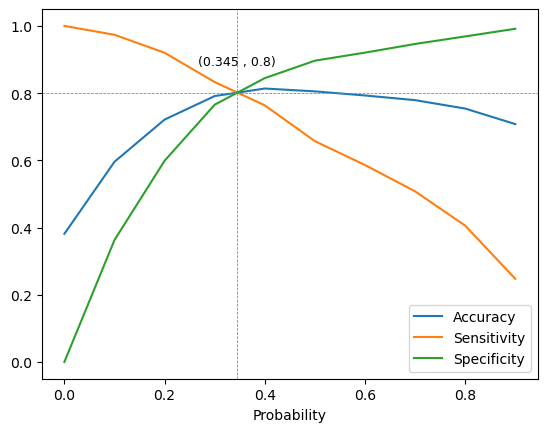

In [402]:
from scipy.interpolate import interp1d
from scipy.optimize import fsolve


Sensi_interp = interp1d(cutoff['Probability'], cutoff['Sensitivity'], kind='linear')
Acc_interp = interp1d(cutoff['Probability'], cutoff['Accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : Sensi_interp(x) - Acc_interp(x), 0.5)), 3)


Speci_interp = interp1d(cutoff['Probability'], cutoff['Specificity'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : Speci_interp(x) - Acc_interp(x), 0.5)), 3)


intersection_x = (intersection_1 + intersection_2) / 2


Accuracy_at_intersection = np.round(float(Acc_interp(intersection_x)), 2)
Sensitivity_at_intersection = np.round(float(Sensi_interp(intersection_x)), 2)
Specificity_at_intersection = np.round(float(Speci_interp(intersection_x)), 2)


cutoff.plot.line(x='Probability', y=['Accuracy', 'Sensitivity', 'Specificity'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=Accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

 
plt.annotate(f'({intersection_x} , {Accuracy_at_intersection})',
             xy=(intersection_x, Accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)


plt.show()

In [403]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.345 else 0)


y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"], axis = 1, inplace = True) 
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted
0          0        0.474082         1871                1
1          0        0.073252         6795                0
2          0        0.249087         3516                0
3          0        0.768973         8105                1
4          0        0.212973         3934                0

### Confusion Matrix for Train

In [404]:
print("Accuracy :", metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

Accuracy : 0.8045763760049475


In [410]:
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))

In [411]:
CM = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("*"*50,"\n")

print("Confusion Matrix")
#print(confusion_matrix,"\n")

print("*"*50,"\n")


logreg_all_metrics(CM)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
************************************************** 

True Negative                    :  3230
True Positive                    :  1974
False Negative                   :  492
False Positve                    :  772
Model Accuracy                   :  0.8046
Model Sensitivity                :  0.8005
Model Specificity                :  0.8071
Model Precision                  :  0.7189
Model Recall                     :  0.8005
Model True Positive Rate (TPR)   :  0.8005
Model False Positive Rate (FPR)  :  0.1929


************************************************** 



### Precision & Recall Trade-off

In [412]:
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

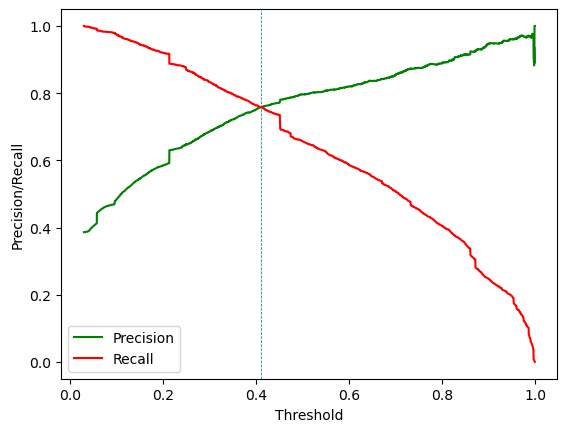

In [413]:
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")



plt.axvline(x=0.41, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

In [414]:
y_train_precision_recall = y_train_pred_final.copy()

In [415]:
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_precision_recall.head()

Converted  Converted_Prob  Prospect ID  final_predicted  \
0          0        0.474082         1871                1   
1          0        0.073252         6795                0   
2          0        0.249087         3516                0   
3          0        0.768973         8105                1   
4          0        0.212973         3934                0   

   precision_recall_prediction  
0                            1  
1                            0  
2                            0  
3                            1  
4                            0

In [416]:
CM = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("*"*50,"\n")

print("Confusion Matrix")
print(CM,"\n")

print("*"*50,"\n")


logreg_all_metrics(CM)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[3406  596]
 [ 596 1870]] 

************************************************** 

True Negative                    :  3406
True Positive                    :  1870
False Negative                   :  596
False Positve                    :  596
Model Accuracy                   :  0.8157
Model Sensitivity                :  0.7583
Model Specificity                :  0.8511
Model Precision                  :  0.7583
Model Recall                     :  0.7583
Model True Positive Rate (TPR)   :  0.7583
Model False Positive Rate (FPR)  :  0.1489


************************************************** 



### Lead Score Feature Addition to Train Data

In [417]:
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score
0          0        0.474082         1871                1          47
1          0        0.073252         6795                0           7
2          0        0.249087         3516                0          25
3          0        0.768973         8105                1          77
4          0        0.212973         3934                0          21

# **Prediction on Test Data**

In [418]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 46 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          2772 non-null   int64  
 1   TotalVisits                                           2772 non-null   float64
 2   Total Time Spent on Website                           2772 non-null   int64  
 3   Page Views Per Visit                                  2772 non-null   float64
 4   A free copy of Mastering The Interview                2772 non-null   int64  
 5   Lead Origin_Landing Page Submission                   2772 non-null   uint8  
 6   Lead Origin_Quick Add Form                            2772 non-null   uint8  
 7   Lead Source_Facebook                                  2772 non-null   uint8  
 8   Lead Source_Google                                    2

In [419]:
Cols=X_test.select_dtypes(include=['int64','float64']).columns


X_test[Cols] = scaler.transform(X_test[Cols])

X_test = X_test[rfe_col]
X_test.head()

Total Time Spent on Website  Lead Origin_Landing Page Submission  \
4269                     0.964504                                    0   
2376                    -0.885371                                    0   
7766                    -0.777416                                    0   
9199                    -0.885371                                    0   
4359                    -0.885371                                    0   

      Lead Source_Olark Chat  Lead Source_Reference  \
4269                       0                      0   
2376                       0                      1   
7766                       0                      0   
9199                       1                      0   
4359                       0                      1   

      Lead Source_Welingak Website  Last Activity_Email Opened  \
4269                             0                           0   
2376                             0                           0   
7766                             0                           0   
9199                             0                           0   
4359                             0                           1   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
4269                                      0                     0   
2376                                      0                     0   
7766                                      0                     1   
9199                                      1                     0   
4359                                      0                     0   

      Last Activity_SMS Sent  Specialization_Hospitality Management  \
4269                       1                                      0   
2376                       1                                      0   
7766                       0                                      0   
9199                       0                                      0   
4359                       0                                      0   

      Specialization_Others  \
4269                      1   
2376                      1   
7766                      0   
9199                      1   
4359                      0   

      What is your current occupation_Working Professional  
4269                                                  0     
2376                                                  0     
7766                                                  1     
9199                                                  0     
4359                                                  0

### Prediction on Test Data using Model 4

In [420]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 13)

In [421]:
y_test_pred = logm4.predict(X_test_sm)
y_test_pred[:10]

4269    0.697934
2376    0.860665
7766    0.889241
9199    0.057065
4359    0.871510
9186    0.503859
1631    0.419681
8963    0.154531
8007    0.072344
5324    0.298849
dtype: float64

In [422]:
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

0
4269  0.697934
2376  0.860665
7766  0.889241
9199  0.057065
4359  0.871510

In [423]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

Converted
4269          1
2376          1
7766          1
9199          0
4359          1

In [424]:
y_test_df['Prospect ID'] = y_test_df.index

y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

Converted  Prospect ID         0
0          1         4269  0.697934
1          1         2376  0.860665
2          1         7766  0.889241
3          0         9199  0.057065
4          1         4359  0.871510

In [425]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})


y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         4269          1        0.697934
1         2376          1        0.860665
2         7766          1        0.889241
3         9199          0        0.057065
4         4359          1        0.871510

In [426]:
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.345 else 0)
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted
0         4269          1        0.697934                1
1         2376          1        0.860665                1
2         7766          1        0.889241                1
3         9199          0        0.057065                0
4         4359          1        0.871510                1

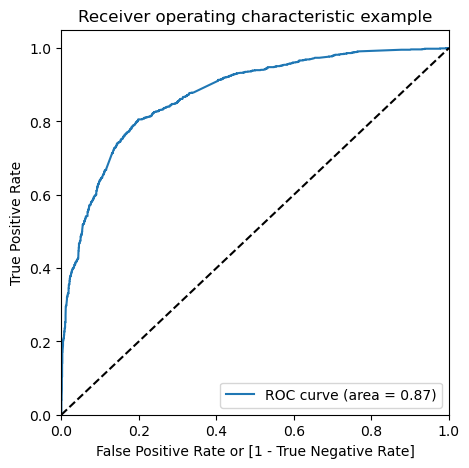

In [427]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

roc1(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

# **Test Data Model Evaluation**

In [428]:
CM = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(CM,"\n")

print("*"*50,"\n")


logreg_all_metrics(CM)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[1353  324]
 [ 221  874]] 

************************************************** 

True Negative                    :  1353
True Positive                    :  874
False Negative                   :  221
False Positve                    :  324
Model Accuracy                   :  0.8034
Model Sensitivity                :  0.7982
Model Specificity                :  0.8068
Model Precision                  :  0.7295
Model Recall                     :  0.7982
Model True Positive Rate (TPR)   :  0.7982
Model False Positive Rate (FPR)  :  0.1932


************************************************** 



In [429]:
parameters=logm4.params.sort_values(ascending=False)
parameters

Lead Source_Welingak Website                            5.388662
Lead Source_Reference                                   2.925326
What is your current occupation_Working Professional    2.669665
Last Activity_SMS Sent                                  2.051879
Last Activity_Others                                    1.253061
Total Time Spent on Website                             1.049789
Last Activity_Email Opened                              0.942099
Lead Source_Olark Chat                                  0.907184
Last Activity_Olark Chat Conversation                  -0.555605
const                                                  -1.023594
Specialization_Hospitality Management                  -1.094445
Specialization_Others                                  -1.203333
Lead Origin_Landing Page Submission                    -1.258954
dtype: float64

## Lead Score Feature on Test Data

In [431]:
y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted  Lead_Score
0         4269          1        0.697934                1          70
1         2376          1        0.860665                1          86
2         7766          1        0.889241                1          89
3         9199          0        0.057065                0           6
4         4359          1        0.871510                1          87